# House Prices - Advanced Regression Techniques


In [1]:
# Here will be put all necessary dependencies
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import export_graphviz
import pydotplus

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Lasso, LassoCV

from sklearn.linear_model import Ridge, RidgeCV

from sklearn.linear_model import BayesianRidge

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

from catboost import CatBoostRegressor

In [2]:
# Loading both given datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
print(df_train.shape, " row/column structure of train data")
print(df_test.shape, " row/column structure of test data")

(1460, 81)  row/column structure of train data
(1459, 80)  row/column structure of test data


In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

So, train data contains 1460 rows and 80 features (excluding Id).
Test data has 1459 rows and 79 features (excluding Id).
The target feature of the dataset is SalesPrice, so it has to be predicted for the test dataset based on the model created from the train dataset data.

It is planned to construct various models for the project, using different approaches and tuning, and then compare the outcome.

## Data exploration

Features in the dataset and their values/ranges

In [6]:
# All features
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# All datatypes
df_train.info(verbose=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [9]:
df_train.describe(include=["object"]).T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [10]:
check_train = df_train.describe(include=["object"])
check_test = df_test.describe(include=["object"])

In [11]:
# Checking that train and test data have the same amount of used values for the features.

for i in check_train:
    print(f"Checking feature {i}")
    print(check_test[i]['count'], check_test[i]['unique'])
    print(check_test[i]['count'], check_test[i]['unique'])
    
    if(check_train[i]['unique'] < check_test[i]['unique']):
        print("Difference")
    
    print()
    

Checking feature MSZoning
1455 5
1455 5

Checking feature Street
1459 2
1459 2

Checking feature Alley
107 2
107 2

Checking feature LotShape
1459 4
1459 4

Checking feature LandContour
1459 4
1459 4

Checking feature Utilities
1457 1
1457 1

Checking feature LotConfig
1459 5
1459 5

Checking feature LandSlope
1459 3
1459 3

Checking feature Neighborhood
1459 25
1459 25

Checking feature Condition1
1459 9
1459 9

Checking feature Condition2
1459 5
1459 5

Checking feature BldgType
1459 5
1459 5

Checking feature HouseStyle
1459 7
1459 7

Checking feature RoofStyle
1459 6
1459 6

Checking feature RoofMatl
1459 4
1459 4

Checking feature Exterior1st
1458 13
1458 13

Checking feature Exterior2nd
1458 15
1458 15

Checking feature MasVnrType
1443 4
1443 4

Checking feature ExterQual
1459 4
1459 4

Checking feature ExterCond
1459 5
1459 5

Checking feature Foundation
1459 6
1459 6

Checking feature BsmtQual
1415 4
1415 4

Checking feature BsmtCond
1414 4
1414 4

Checking feature BsmtExposure

In [12]:
df_train[df_train.isnull().any(axis=1)]


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [13]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [14]:
for i in df_train.columns:
    print(i)
    print(df_train[i].count())

Id
1460
MSSubClass
1460
MSZoning
1460
LotFrontage
1201
LotArea
1460
Street
1460
Alley
91
LotShape
1460
LandContour
1460
Utilities
1460
LotConfig
1460
LandSlope
1460
Neighborhood
1460
Condition1
1460
Condition2
1460
BldgType
1460
HouseStyle
1460
OverallQual
1460
OverallCond
1460
YearBuilt
1460
YearRemodAdd
1460
RoofStyle
1460
RoofMatl
1460
Exterior1st
1460
Exterior2nd
1460
MasVnrType
1452
MasVnrArea
1452
ExterQual
1460
ExterCond
1460
Foundation
1460
BsmtQual
1423
BsmtCond
1423
BsmtExposure
1422
BsmtFinType1
1423
BsmtFinSF1
1460
BsmtFinType2
1422
BsmtFinSF2
1460
BsmtUnfSF
1460
TotalBsmtSF
1460
Heating
1460
HeatingQC
1460
CentralAir
1460
Electrical
1459
1stFlrSF
1460
2ndFlrSF
1460
LowQualFinSF
1460
GrLivArea
1460
BsmtFullBath
1460
BsmtHalfBath
1460
FullBath
1460
HalfBath
1460
BedroomAbvGr
1460
KitchenAbvGr
1460
KitchenQual
1460
TotRmsAbvGrd
1460
Functional
1460
Fireplaces
1460
FireplaceQu
770
GarageType
1379
GarageYrBlt
1379
GarageFinish
1379
GarageCars
1460
GarageArea
1460
GarageQual
137

In [15]:
df_train_work = df_train.copy()

## Missing data handeling

At first, let's see what data is missing.

In [16]:
missing_data = (df_train.isnull().sum().sort_values(ascending=False)).to_frame(name='missing')

In [17]:
missing_data[missing_data["missing"] != 0]

missing
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1

The big number of missed values are in the first several features. Let's see what is inside:

In [18]:
df_train_work["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

Basically, NaNs for some features are defined in the description to the data as NA, showing that the particular house has not this feature in it. E.g. PoolQC NaN should be interpreted as the house has no swimming pool. <br>
Features that allowed NA by description are:
- Alley
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

So, these 14 features will not be dropped due to NaNs, NaNs will be interpreted as NA.

In [19]:
missing_data.drop(
    ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature'], axis=0, inplace = True)


In [20]:
missing_data[missing_data["missing"] != 0]

missing
LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
MasVnrType         8
Electrical         1

Now 5 features left. GarageYrBlt NaNs are the same as the number of houses without garages, so it is ok to left it as it is (later transforming NaN to something appropriate). The rest 4 features can be dropped. Perhaps, it is possible to assume which values can be fixed in NaNs of MasVnrType and Electrical, but LotFrontage and MasVnrArea are not guessable, as well as using some aggregate value can lead to a false assumptions and incorrect models.

It should be noted, that corresponding changes has to be done in the dataset for prediction too.

In [21]:
df_train_work.drop(['LotFrontage', 
                    'MasVnrArea', 
                    'MasVnrType', 
                    'Electrical'], 
                   axis=1, inplace = True)

df_test.drop(['LotFrontage', 
                    'MasVnrArea', 
                    'MasVnrType', 
                    'Electrical'], 
                   axis=1, inplace = True)

In [22]:
for col in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature']:
    df_train_work[col] = df_train_work[col].replace(np.nan, "NA")
    df_test[col] = df_test[col].replace(np.nan, "NA")

In [23]:
df_train_work['GarageYrBlt'] = df_train_work['GarageYrBlt'].replace(np.nan, 0)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].replace(np.nan, 0)

Also,GarageYrBlt feature was considered as float, so have to cast it to int.

In [24]:
df_train_work['GarageYrBlt'] = df_train_work['GarageYrBlt'].astype(int)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].astype(int)

Data for prediction might have its own missed values.

In [25]:
(df_test.isnull().sum().sort_values(ascending=False)).to_frame(name='missing')


missing
MSZoning             4
BsmtFullBath         2
BsmtHalfBath         2
Utilities            2
Functional           2
GarageArea           1
TotalBsmtSF          1
BsmtUnfSF            1
BsmtFinSF2           1
KitchenQual          1
BsmtFinSF1           1
Exterior2nd          1
Exterior1st          1
GarageCars           1
SaleType             1
EnclosedPorch        0
OpenPorchSF          0
FullBath             0
HalfBath             0
BedroomAbvGr         0
KitchenAbvGr         0
YrSold               0
MoSold               0
MiscVal              0
MiscFeature          0
Fence                0
TotRmsAbvGrd         0
PoolQC               0
Fireplaces           0
FireplaceQu          0
GarageType           0
GarageYrBlt          0
GarageFinish         0
PoolArea             0
ScreenPorch          0
GrLivArea            0
3SsnPorch            0
GarageQual           0
GarageCond           0
PavedDrive           0
WoodDeckSF           0
Id                   0
CentralAir           0
LowQualFinSF         0
YearBuilt            0
LotArea              0
Street               0
Alley                0
LotShape             0
LandContour          0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
YearRemodAdd         0
2ndFlrSF             0
RoofStyle            0
RoofMatl             0
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual             0
BsmtCond             0
BsmtExposure         0
BsmtFinType1         0
BsmtFinType2         0
Heating              0
HeatingQC            0
MSSubClass           0
1stFlrSF             0
SaleCondition        0

Indeed it has. All the values are numerical, so it can be assumed that they are 0's (no such thing exist in the house).

In [26]:
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].replace(np.nan, 0)
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].replace(np.nan, 0)
df_test['GarageCars'] = df_test['GarageCars'].replace(np.nan, 0)
df_test['GarageArea'] = df_test['GarageArea'].replace(np.nan, 0)
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].replace(np.nan, 0)
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].replace(np.nan, 0)
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].replace(np.nan, 0)
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].replace(np.nan, 0)

(df_test.isnull().sum().sort_values(ascending=False)).to_frame(name='missing')


missing
MSZoning             4
Utilities            2
Functional           2
Exterior2nd          1
SaleType             1
Exterior1st          1
KitchenQual          1
TotRmsAbvGrd         0
GarageFinish         0
GarageYrBlt          0
GarageType           0
FireplaceQu          0
Fireplaces           0
Id                   0
KitchenAbvGr         0
HalfBath             0
FullBath             0
BsmtHalfBath         0
BsmtFullBath         0
GrLivArea            0
BedroomAbvGr         0
GarageArea           0
GarageCars           0
2ndFlrSF             0
YrSold               0
MoSold               0
MiscVal              0
MiscFeature          0
Fence                0
PoolQC               0
PoolArea             0
ScreenPorch          0
3SsnPorch            0
EnclosedPorch        0
OpenPorchSF          0
WoodDeckSF           0
PavedDrive           0
GarageCond           0
GarageQual           0
LowQualFinSF         0
CentralAir           0
1stFlrSF             0
Neighborhood         0
OverallCond          0
OverallQual          0
HouseStyle           0
BldgType             0
Condition2           0
Condition1           0
LandSlope            0
YearRemodAdd         0
LotConfig            0
LandContour          0
LotShape             0
Alley                0
Street               0
LotArea              0
YearBuilt            0
RoofStyle            0
MSSubClass           0
BsmtFinSF1           0
HeatingQC            0
Heating              0
TotalBsmtSF          0
BsmtUnfSF            0
BsmtFinSF2           0
BsmtFinType2         0
BsmtFinType1         0
RoofMatl             0
BsmtExposure         0
BsmtCond             0
BsmtQual             0
Foundation           0
ExterCond            0
ExterQual            0
SaleCondition        0

This finishes data cleaning for now (still categorical features remain categorical).

## Exploratory analysis

It's good to start with a correlation (of numerical features only) to see, whether there is any correlation at all (using both Pearson and Spearman correlation).

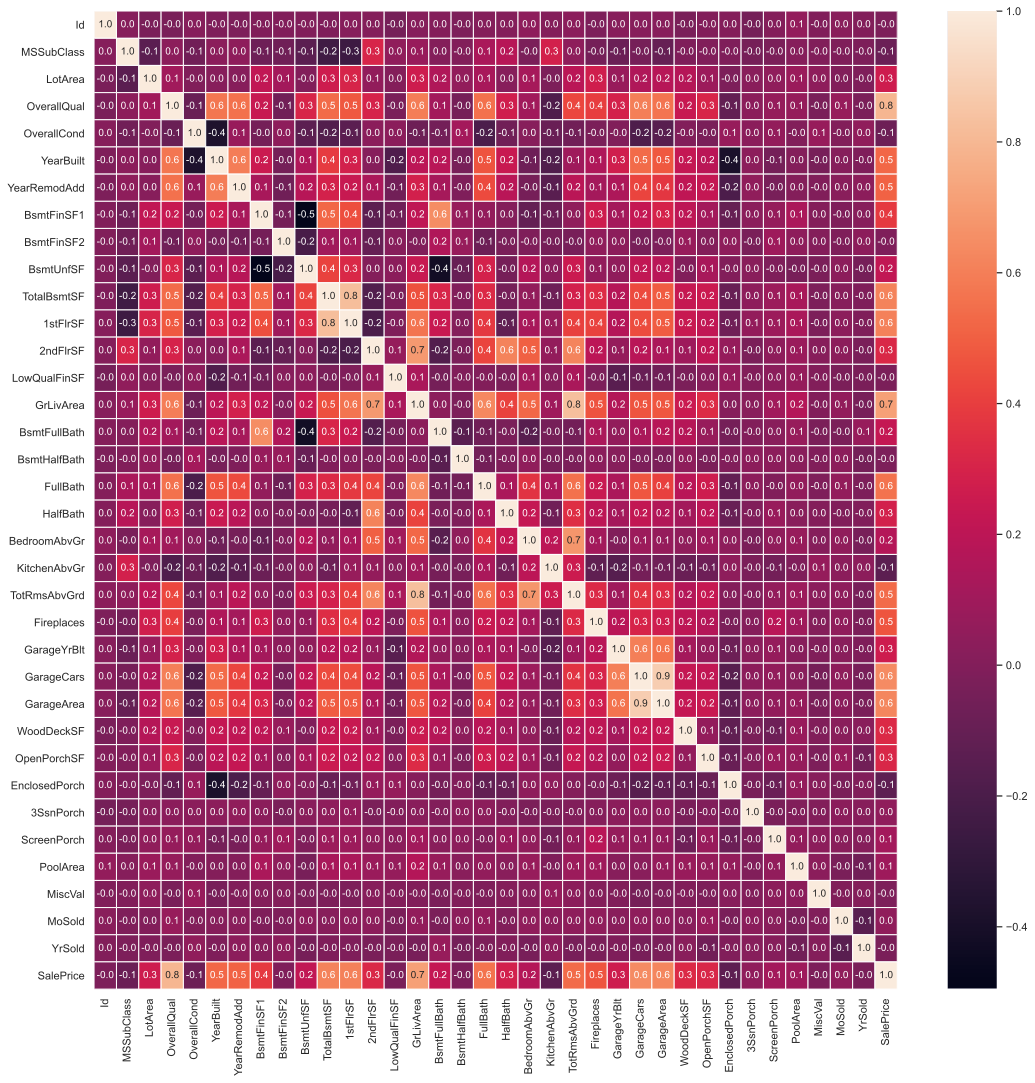

In [27]:
fig, ax = plt.subplots(figsize=(18,18)) 

corr = df_train_work.corr()
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1.0, ax=ax);

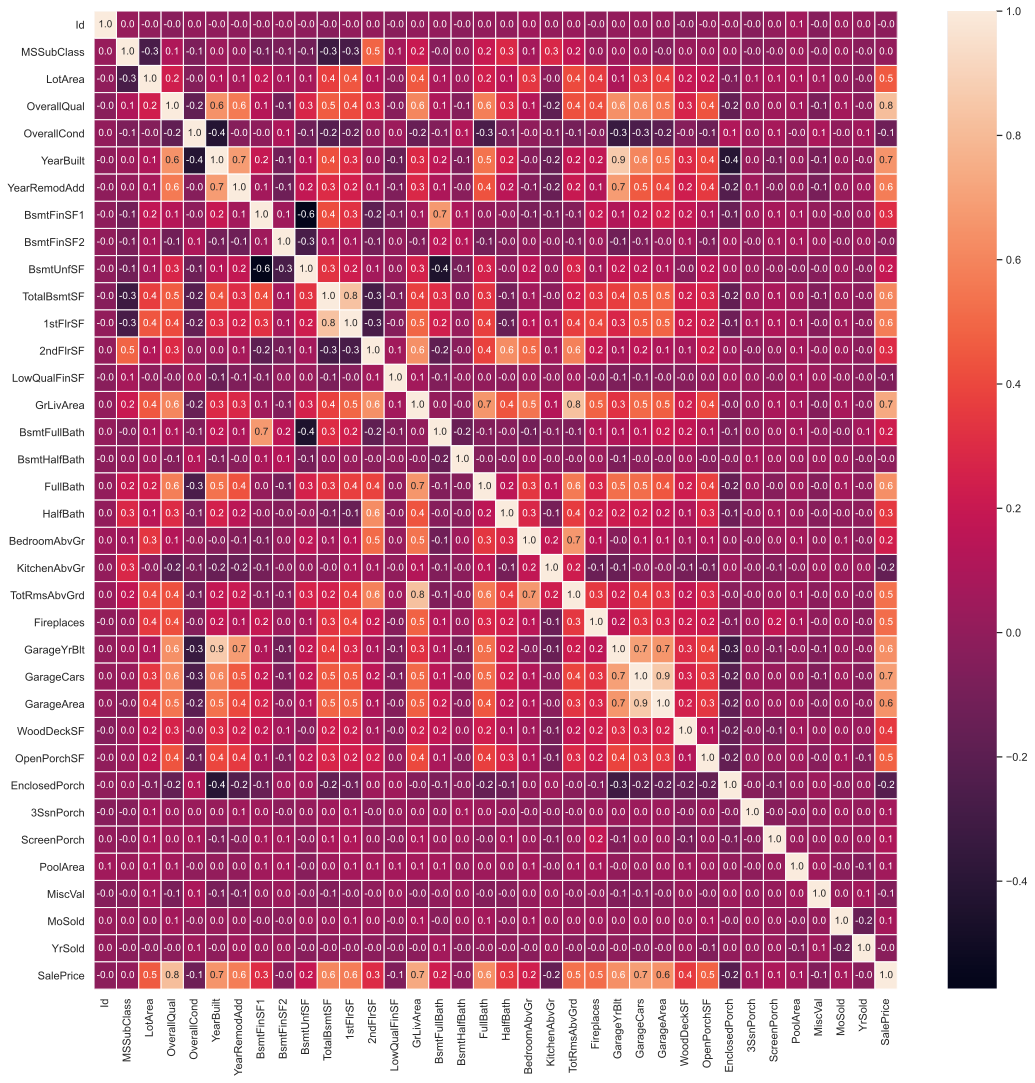

In [28]:
fig, ax = plt.subplots(figsize=(18,18)) 

corr_sp = df_train_work.corr(method="spearman")
sns.heatmap(corr_sp, annot=True, fmt=".1f", linewidths=1.0, ax=ax);

There quite a number features, so heatmaps are quite big. Nevertheless, some features have quite high correlation with target feature SalePrice:
- LotArea
- OverallQual (seems like it could be main predictor)
- YearBuilt
- YearRemodeAdd
- TotalBsmtSF
- 1srFlrSF
- GrLivAreaa
- FullBath
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea
- OpenPorchSF

All of them has positive correlation with the target feature. Also, it should be noted, that there are several features who have very strong correlation between them, so there could be a problem with e.g. multicollinearity in some linear model approaches. Such features are: GarageYrBlt and YearBuilt (0.9, almost full correlation, like a linear combination), as well as GarageYrBlt and YearRemodeAdd (0.7), TotRmsAbvGrd and GrLivArea, (0.8). 
<br>
For some models, features that has no, or non-significant correation, presumably can be dropped.

Next thing to look at - the distribution of the dependent variable (target feature).

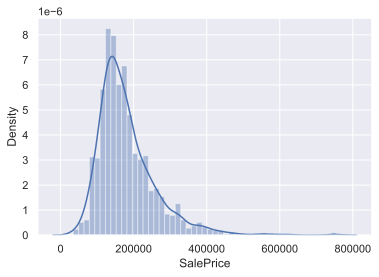

In [29]:
sns.distplot(df_train_work["SalePrice"]);

Distplot is showing that it is looks like a normal distirbution (almost), with positive skewness. Thus, the distribution is a right-skewed (has a peak on the left side, and a long tail on the right). 

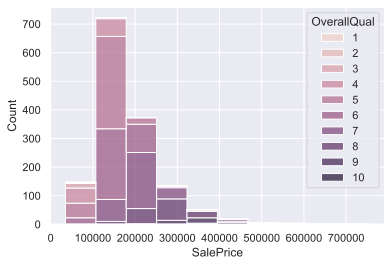

In [30]:
sns.histplot(x = 'SalePrice', hue = 'OverallQual', data = df_train_work, bins=10, multiple="stack");

Histplot with 10 bins for SalePrice and OverallQual as a stacked bar (exploring the highly correlated feature), showing that yes, as the price going up - the overall quality of the real estate is also increasing (as a trend), but not fully describes particular bin.

There are really many features to look at, but now I move to the categorical features and see relation of some of them to the target feature.

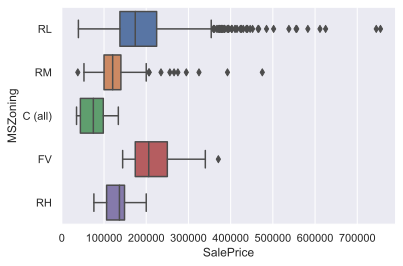

In [31]:
sns.boxplot(
    y="MSZoning",
    x="SalePrice",
    data=df_train_work,
    orient="h",
);

Boxplot shows, that all of the highest prices (even though they are outliars), are related to the one single zone - RL. However the median price is lower than in FV.
<br>
<br>
The lowest median prices is in C zone.
<br>
<br>
RH and RM are quite the same between Q1 and Q3, as well as for right whisker, but RM has several high-prices properties (which are outliers). 

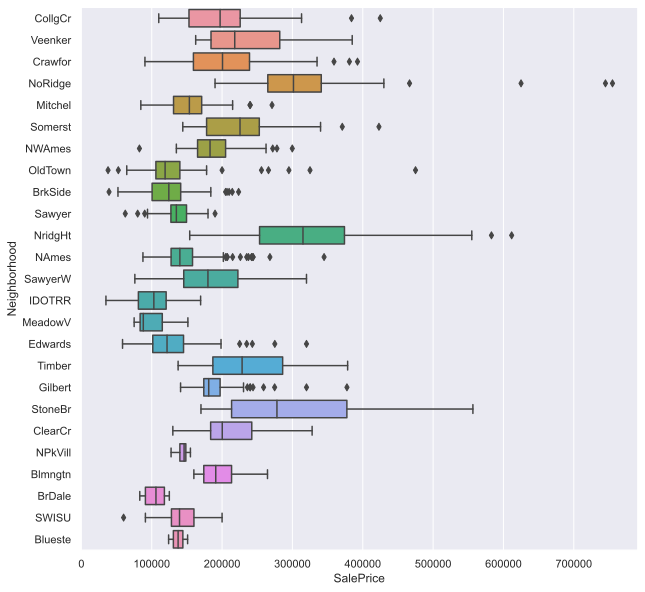

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.boxplot(
    y="Neighborhood",
    x="SalePrice",
    data=df_train_work,
    orient="h",
    ax = ax,
);

The neighborhood analysis shows, that the real estate in some of the areas are cost more, than the in the others. As well as there are several well-distinguishable neighborhoods with lower cost.

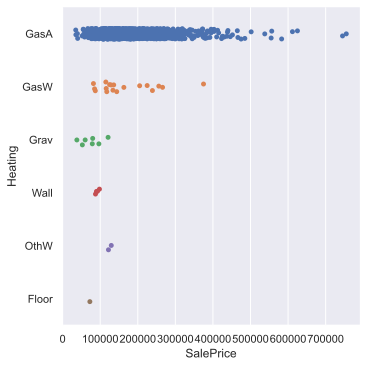

In [33]:
sns.catplot(x="SalePrice", y="Heating", data=df_train_work);

The distribution of the Heating feature is not equal, but it is clearly seen, that GasA type of heating is prevailing and, the high-priced houses come only with GasA type.

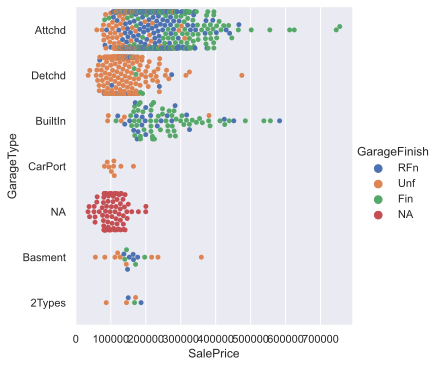

In [34]:
sns.catplot(x="SalePrice", y="GarageType", 
            hue = "GarageFinish", data=df_train_work, kind="swarm");


This are the features, that were changed to NA from NaNs. And it is interesting to see, that NA = NA, so NaNs were interpreted correctly. It is also giving an information, that no garage leads to smaller price, than BuiltIn or Attached type. Higher price is prevailing, when the garage is finished or RFned, but there are couple of exceptions, where the garage is unfinished, but the price is high enough (it is explained by some other factors).

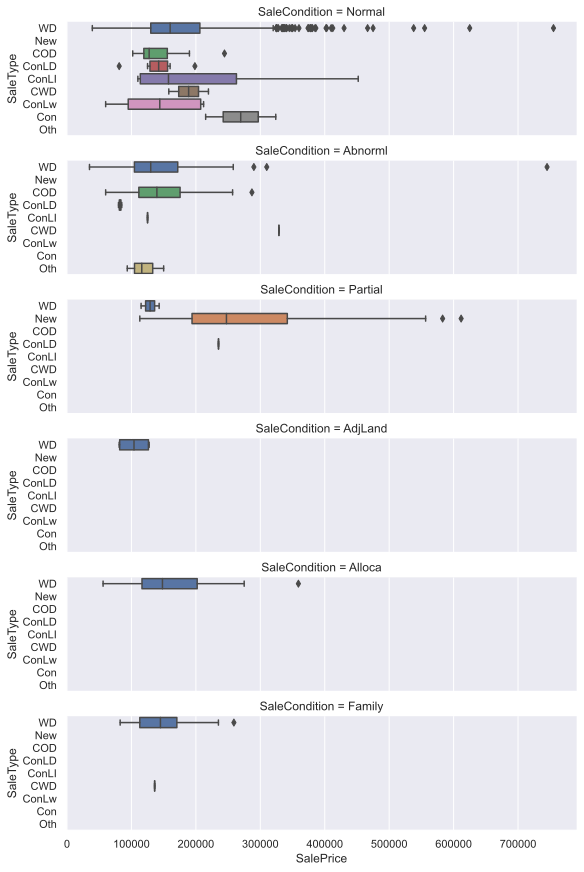

In [35]:
g = sns.catplot(x="SalePrice", y="SaleType", row="SaleCondition",
                kind="box", orient="h", height=2, aspect=4,
                data=df_train_work)


Some cases in this catplot indicating low price combinations of SaleType and SaleCondition, but the most interesting is New + Partial, which has higher price in general, than the rest of the combinations.

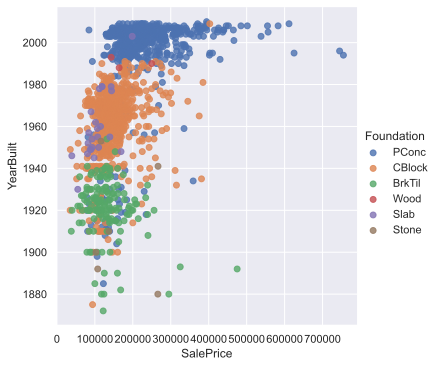

In [36]:
sns.lmplot("SalePrice", "YearBuilt", data=df_train_work, hue="Foundation", fit_reg=False);

Lmplot is showing interesting natural "clustering", by showing which technology was the main for the house foundation throughout the years. But it gives no real practical value. But, the other thing that is nicely shown here is that houses that cost more 400,000 are modern ones (1980 and newer). Only one older house cost more than 400,000.

For now this is it with visualization of the data. The section could be expanded, if the need will arise.

## Models

### Naive approach - Label encoding + Multiple linear regression

The first thing to try - is the most simple linear model. In order to put in all the features, the categorical ones have to be transformed to numerical. There are several approaches to it. I'll start with the label encoding, but keeping in mind, that such an approach is usually bad, as values of the features becoming directly comparable, which lead to misinterpretation in models.
<br>

But this model will be such a milestone (for comparing the rest of the models), perhaps being the worst one overall.

In [37]:
# Making a copy of the main df, in order not to mess with already cleared data
df_train_work_le = df_train_work.copy()

# Target variable is separated and dropped. Also Id is dropped, as it is useless for predictions
y_train = df_train_work_le["SalePrice"]
df_train_work_le.drop(["SalePrice", "Id"], axis=1, inplace = True)

# Each of the categorical features (object type) is transformed to numerical
for col in df_train_work.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded = le.fit_transform(df_train_work[col])
    df_train_work_le[col] = encoded


In [38]:
# Yup, it worked out
df_train_work_le.head()

MSSubClass  MSZoning  LotArea  Street  Alley  LotShape  LandContour  \
0          60         3     8450       1      1         3            3   
1          20         3     9600       1      1         3            3   
2          60         3    11250       1      1         0            3   
3          70         3     9550       1      1         0            3   
4          60         3    14260       1      1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           2           2   
1          0          2          0            24           1           2   
2          0          4          0             5           2           2   
3          0          0          0             6           2           2   
4          0          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5            7            5       2003          2003   
1         0           2            6            8       1976          1976   
2         0           5            7            5       2001          2002   
3         0           5            7            5       1915          1970   
4         0           5            8            5       2000          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  ExterQual  ExterCond  \
0          1         1           12           13          2          4   
1          1         1            8            8          3          4   
2          1         1           12           13          2          4   
3          1         1           13           15          3          4   
4          1         1           12           13          2          4   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0           2         2         4             4             2         706   
1           1         2         4             1             0         978   
2           2         2         4             2             2         486   
3           0         4         1             4             0         216   
4           2         2         4             0             2         655   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0             6           0        150          856        1          0   
1             6           0        284         1262        1          0   
2             6           0        434          920        1          0   
3             6           0        540          756        1          2   
4             6           0        490         1145        1          0   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           1       856       854             0       1710             1   
1           1      1262         0             0       1262             0   
2           1       920       866             0       1786             1   
3           1       961       756             0       1717             1   
4           1      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1            2   
1             1         2         0             3             1            3   
2             0         2         1             3             1            2   
3             0         1         0             3             1            2   
4             0         2         1             4             1            2   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  \
0             8           6           0            3           1         2003   
1             6           6           1            5           1         1976   
2             6           6           1            5           1         2001   
3          

In [39]:
# Id of the dataset for prediction is saved explicitly and dropped
id_test = df_test["Id"].copy()
df_test.drop(["Id"], axis=1, inplace = True)
df_test_le = df_test.copy()
# The rest is the same - encoded categorical features
for col in df_test_le.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded = le.fit_transform(df_test_le[col])
    df_test_le[col] = encoded

In [40]:
# Fit the model with 75 predictors
reg_le = LinearRegression().fit(df_train_work_le, y_train)
reg_le.score(df_train_work_le, y_train)


0.8498456558487146

The $R^2$ of the created model is quite good for starters, I have expected much worser, 84.98% of changes in SalePrice is explained by these 75 features.

However, the model (from statistical point of view) is higly suffered from multicollinearity. The check is very rough, but VIF (variance inflation factor) can be calculated, e.g. by the statsmodels:

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
mult_counter = 0
for i in range(75):
    res = variance_inflation_factor(df_train_work_le.to_numpy(), i)
    print(res)
    if res > 5:
        mult_counter += 1
        
print("Total mult: ", mult_counter)

14.896693820799838
35.831016145605055
3.4229243011008044
286.3092083069764
21.584502327214935
3.6362617580024295
21.521647762269208
1.082904579403625
5.023143868577616
1.7064652706017653
6.452964703627985
7.303217640680461
67.0656341591585
5.323442685262753
7.847226924473319
79.86526768089111
50.717949889808935
30944.71870701853
24844.561897997835
4.828242608210393
5.016466645770515
40.51422691738961
38.397897297541036
38.42561875697684
33.04303031383946
9.739160318894202
13.869117832222825
19.5324923531572
6.779936551295011
5.83687408318557
inf
52.11882184820971
inf
inf
inf
17.246528495415223
2.9651940560009997
26.999200091677803
inf
inf
inf
inf
3.9075848051069006
1.3066699107366453
28.669347655475264
3.7046501226002597
35.579527768252596
41.25964814557952
18.47637795211866
90.45987598307148
44.18773412758857
3.2078591367009173
9.734673403713817
5.599744633400944
50.55897095460496
6.239563581907938
42.7622300357154
33.86573534496028
56.95058391258934
75.16968951362138
22.8209637930417

So, the VIF > 5 showing that there is a mulicollinearity, and in this model 59 features are demonstrating it. Thus the model can be very biased, and poorly interpretable, even if the $R^2$ is high. The large standard errors will be also due to it.

Another thing to notice, that I did not split the train data into train and validation subsets due to the low number of observations. Thus the model may be biased (overfitted) based on the training set.

Nevertheless, it is time to make a prediction and see the results. Nevertheless, nothing good is expected from this model.

In [43]:
# Combining Id + prediction to comply with the format of submission
result_le = id_test
result_le = result_le.to_frame()
result_le["SalePrice"] = reg_le.predict(df_test_le)

In [44]:
result_le.to_csv('result_le.csv', index=False)

The Kaggle gives a result of RMSE is 0.44779, which is very high. Nevertheless, this is a milestone for making a better models. The Muitiple Linear Regression is not the great choice for the dataset. The relation between the data is not linear too. From the statistical point of view the resulted model can be tuned, various different statistics / feature importance / disabling mulicollinearity / scedasticity checking / etc can be done, but it could give a litte value from the ML point of view.
<br>

Label encoding is not the great to be used either and it is giving its own bias in the results too.


## Dummy variables + Multiple linear regression

Another approach is to encode variables as dummy variables columns.

In [45]:
categorical_columns = [c for c in df_train_work.columns if df_train_work[c].dtype.name == "object"]
numerical_columns = [c for c in df_train_work.columns if df_train_work[c].dtype.name != "object"]

In [46]:
df_train_work_dv = pd.concat(
    [df_train_work[numerical_columns], pd.get_dummies(df_train_work[categorical_columns])],
    axis=1,
)

In [47]:
numerical_columns.remove('Id')
numerical_columns.remove('SalePrice')
df_test_work_dv = pd.concat(
    [df_test[numerical_columns], pd.get_dummies(df_test[categorical_columns])],
    axis=1,
)

Interesting problem arises - the number of features in training set is somehow more than in test after making it as dummy. 

In [48]:
print(df_train_work_dv.shape)
print(df_test_work_dv.shape)

(1460, 293)
(1459, 274)


There 2 ways how to deal with it - add missing columns to test dataset filled with 0's or fully drop extra columns from train dataset. I use the second approach.

In [49]:
for i in df_test_work_dv.columns:
    if i not in df_train_work_dv.columns:
        print(i)

In [50]:
for i in df_train_work_dv.columns:
    if i not in df_test_work_dv.columns:
        df_train_work_dv.drop([i], axis = 1, inplace = True)
        print(i)

Id
SalePrice
Utilities_NoSeWa
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
HouseStyle_2.5Fin
RoofMatl_ClyTile
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
Heating_Floor
Heating_OthW
GarageQual_Ex
PoolQC_Fa
MiscFeature_TenC


In [51]:
print(df_train_work_dv.shape)
print(df_test_work_dv.shape)

(1460, 274)
(1459, 274)


In [52]:
df_train_work_dv.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             3             1             8           0         2003   
1             3             1             6           1         1976   
2             3             1             6           1         2001   
3             3             1             7           1         1998   
4             4             1             9           1         2000   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  MSZoning_C (all)  \
0            0         0        0       2    2008                 0   
1            0         0        0       5    2007                 0   
2            0         0        0       9    2008                 0   
3            0         0        0       2    2006                 0   
4            0         0        0      12    2008                 0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  \
0            0            0            1            0            0   
1            0            0            1            0            0   
2            0            0            1            0            0   
3            0            0            1            0            0   
4            0            0            1            0            0   

   Street_Pave  Alley_Grvl  Alley_NA  Alley_Pave  LotShape_IR1  LotShape_IR2  \
0            1           0         1           0             0             0   
1            1           0         1           0             0             0   
2            1           0         1           0             1             0   
3            1           0         1           0             1             0   
4            1           0         1           0             1             0   

   LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0        

In [53]:
df_test_work_dv.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          20    11622            5            6       1961          1961   
1          20    14267            6            6       1958          1958   
2          60    13830            5            5       1997          1998   
3          60     9978            6            6       1998          1998   
4         120     5005            8            5       1992          1992   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0       468.0       144.0      270.0        882.0       896         0   
1       923.0         0.0      406.0       1329.0      1329         0   
2       791.0         0.0      137.0        928.0       928       701   
3       602.0         0.0      324.0        926.0       926       678   
4       263.0         0.0     1017.0       1280.0      1280         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        896           0.0           0.0         1         0   
1             0       1329           0.0           0.0         1         1   
2             0       1629           0.0           0.0         2         1   
3             0       1604           0.0           0.0         2         1   
4             0       1280           0.0           0.0         2         0   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             2             1             5           0         1961   
1             3             1             6           0         1958   
2             3             1             6           1         1997   
3             3             1             7           1         1998   
4             2             1             5           0         1992   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         1.0       730.0         140            0              0          0   
1         1.0       312.0         393           36              0          0   
2         2.0       482.0         212           34              0          0   
3         2.0       470.0         360           36              0          0   
4         2.0       506.0           0           82              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  MSZoning_C (all)  \
0          120         0        0       6    2010                 0   
1            0         0    12500       6    2010                 0   
2            0         0        0       3    2010                 0   
3            0         0        0       6    2010                 0   
4          144         0        0       1    2010                 0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  \
0            0            1            0            0            0   
1            0            0            1            0            0   
2            0            0            1            0            0   
3            0            0            1            0            0   
4            0            0            1            0            0   

   Street_Pave  Alley_Grvl  Alley_NA  Alley_Pave  LotShape_IR1  LotShape_IR2  \
0            1           0         1           0             0             0   
1            1           0         1           0             1             0   
2            1           0         1           0             1             0   
3            1           0         1           0             1             0   
4            1           0         1           0             1             0   

   LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             1                0                0   
1             0             0                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0        

In [54]:
reg_dv = LinearRegression().fit(df_train_work_dv, y_train)
reg_dv.score(df_train_work_dv, y_train)

0.9251872657219886

$R^2$ for the model is higher - 92.52%, but considering the number of features - it is hardly doing any good due to the multicollinearity isuues.

In [55]:
result_dv = id_test
result_dv = result_dv.to_frame()
result_dv["SalePrice"] = reg_dv.predict(df_test_work_dv)

In [56]:
result_dv.to_csv('result_dv.csv', index=False)

MSE is went up 0.52509, thus the model became worse. The other options (like add missing columns filled with 0 to the test data lead to even worser MSE).

After using these 2 models data is nicely prepared as:
- df_train_work_le - labeled training set
- df_test_le - labeled set for prediction
- df_train_work_dv - dummy training set
- df_test_work_dv - dummy set for prediction
- y_train - target variable for training

## Decision tree regressor - tuned tree (label encoding)

Looking for the best parameters for tree by looking at various combinatios of max_depth + max_features.

In [60]:
tree_params = {"max_depth": range(2, 50),
              "max_features": range(2, 76, 4)}

tree = DecisionTreeRegressor(random_state=17)
locally_best_tree = GridSearchCV(tree, tree_params, cv=5)
locally_best_tree.fit(df_train_work_le, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=17),
             param_grid={'max_depth': range(2, 50),
                         'max_features': range(2, 76, 4)})

In [61]:
print("Tree information:", round(locally_best_tree.best_score_ * 100, 2), "%")
print("Best_params:", locally_best_tree.best_params_)

Tree information: 77.15 %
Best_params: {'max_depth': 18, 'max_features': 54}


With these results fitting the tree:

In [62]:
tuned_tree = DecisionTreeRegressor(max_depth=18, max_features = 54 ,random_state = 17)
tuned_tree.fit(df_train_work_le, y_train)
tuned_tree_predictions = tuned_tree.predict(df_test_le)

In [64]:
result_tr = id_test
result_tr = result_tr.to_frame()
result_tr["SalePrice"] = tuned_tree_predictions
result_tr.to_csv('tuned_tree_predictions.csv', index=False)

The results are becoming better - RMSE went down to 0.20753, which is a huge improvement overall, compared to the linear models.

In [76]:
def tree_graph_to_svg(tree, feature_names, png_file_to_save, class_name):
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None, class_names=class_name,
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    #graph.write_png(png_file_to_save)
    graph.write_svg(png_file_to_save)

In [77]:
tree_graph_to_svg(
    tree=tuned_tree,
    feature_names=df_train_work_le.columns,
    png_file_to_save="tuned_tree.svg",
    class_name = None
)

The resulted tree visualization is too big to show here, but it can be seen in the folder explicitly.

Overall, model performed better, but results are more biased based on the training set.

## Random Forest Regressor (not tuned, label encoding)

Nothing more to say - deafult RF regressor, not tuned, used label encoding.

In [80]:
rf_nt = RandomForestRegressor(n_estimators=100, random_state=17)
rf_nt.fit(df_train_work_le, y_train)
pr_nt = rf_nt.predict(df_test_le)

In [82]:
result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('rfr_nt.csv', index=False)

The results are improved, compared to the Tuned Tree, RMSE went down to 0.14604. The best result so far.

## Random Forest Regressor (not tuned, dummy variables)

Let's see how the results are differ with usage of dummy variables (the rest is the same):

In [83]:
rf_nt_dv = RandomForestRegressor(n_estimators=100, random_state=17)
rf_nt_dv.fit(df_train_work_dv, y_train)
pr_nt_dv = rf_nt_dv.predict(df_test_work_dv)

In [85]:
result_rf_nt_dv = id_test
result_rf_nt_dv = result_rf_nt_dv.to_frame()
result_rf_nt_dv["SalePrice"] = pr_nt_dv
result_rf_nt_dv.to_csv('rfr_nt_dv.csv', index=False)

The results are slightly improved, RMSE went is 0.14517.

## Random Forest Regressor (tuned, label encoding)

In [97]:
forest_params = {'max_depth': range(2, 50, 2), 'max_features': range(2, 76, 2)}
tree_forest = RandomForestRegressor(n_estimators=100, random_state=17, n_jobs=-1)
locally_best_forest = GridSearchCV(tree_forest, forest_params, cv=5, n_jobs=-1, verbose=True)

locally_best_forest.fit(df_train_work_le, y_train);

Fitting 5 folds for each of 888 candidates, totalling 4440 fits


In [98]:
locally_best_forest.best_params_

{'max_depth': 22, 'max_features': 34}

In [99]:
pr_tu = locally_best_forest.predict(df_test_le)

In [100]:
result_pr_tu = id_test
result_pr_tu = result_pr_tu.to_frame()
result_pr_tu["SalePrice"] = pr_tu
result_pr_tu.to_csv('rfr_tu.csv', index=False)

I tries also with cv=3, different range and so on. With it - depth 18, max features = 62; RMSE was 0.14957, which is worser than not-tuned forest.

With current values of max depth = 22, max features = 34, RMSE improved: 0.14395.

## Random Forest Regressor (tuned, dummy variables)

In [137]:
forest_params_dv = {'max_depth': range(2, 50, 2), 'max_features': range(2, 275, 5)}
tree_forest_dv = RandomForestRegressor(n_estimators=100, random_state=17, n_jobs=-1)
locally_best_forest_dv = GridSearchCV(tree_forest_dv, forest_params_dv, cv=5, n_jobs=-1, verbose=True)

locally_best_forest_dv.fit(df_train_work_dv, y_train);

Fitting 5 folds for each of 1320 candidates, totalling 6600 fits


In [138]:
pr_tu_dv = locally_best_forest_dv.predict(df_test_work_dv)

In [140]:
locally_best_forest_dv.best_params_

{'max_depth': 14, 'max_features': 82}

In [141]:
result_pr_tu_dv = id_test
result_pr_tu_dv = result_pr_tu_dv.to_frame()
result_pr_tu_dv["SalePrice"] = pr_tu_dv
result_pr_tu_dv.to_csv('rfr_tu_dv.csv', index=False)

With the locally best forest (max depth 14, max features = 82) RMSE is 0.14392.

## Lasso Regression (label encoding, simple)

In [106]:
lasso = Lasso(alpha=0.01, random_state=17)
lasso.fit(df_train_work_le, y_train);

In [107]:
pr_lasso = lasso.predict(df_test_le)

In [112]:
result_pr_lasso = id_test
result_pr_lasso = result_pr_lasso.to_frame()
result_pr_lasso["SalePrice"] = pr_lasso
result_pr_lasso.to_csv('result_lasso.csv', index=False)

Minor improvement from Linear regression. RMSE is 0.44778.

## Lasso Regression (label encoding, cross-validation)

In [109]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas, random_state=17, cv=5)
lasso_cv.fit(df_train_work_le, y_train);

In [113]:
pr_lasso_cv = lasso_cv.predict(df_test_le)

In [114]:
result_pr_lasso_cv = id_test
result_pr_lasso_cv = result_pr_lasso_cv.to_frame()
result_pr_lasso_cv["SalePrice"] = pr_lasso_cv
result_pr_lasso_cv.to_csv('result_lasso_cv.csv', index=False)

Improvement from ordinary Lasso. RMSE = 0.32349.

## Rigde Regression (label encoding, simple)

In [116]:
ridge = Ridge(alpha=0.01, random_state=17)
ridge.fit(df_train_work_le, y_train);

In [117]:
pr_ridge = ridge.predict(df_test_le)

In [118]:
pr_ridge

array([187736.43858423, 240968.83303105, 247885.32674262, ...,
       238665.52406337, 202921.78930279, 330994.7496474 ])

In [123]:
result_pr_ridge = id_test
result_pr_ridge = result_pr_ridge.to_frame()
result_pr_ridge["SalePrice"] = pr_ridge
result_pr_ridge.to_csv('result_ridge.csv', index=False)

Better than Linear and Lasso, but worser than the rest. RMSE = 0.44720.

## Rigde regression (label encoding, cross-validation)

In [120]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(df_train_work_le, y_train);

In [121]:
pr_ridge_cv = ridge_cv.predict(df_test_le)

In [124]:
result_pr_ridge_cv = id_test
result_pr_ridge_cv = result_pr_ridge_cv.to_frame()
result_pr_ridge_cv["SalePrice"] = pr_ridge_cv
result_pr_ridge_cv.to_csv('result_ridge_cv.csv', index=False)

The best result from regressions so far - RMSE is 0.16087, but still worser, than Tuned RF regressor with dummy variables.

## Rigde regression (dummy variables, cross-validation)

In [59]:
alphas = np.logspace(-6, 2, 200)

ridge_cv_dv = RidgeCV(alphas=alphas, cv=5)
ridge_cv_dv.fit(df_train_work_dv, y_train);

In [60]:
pr_ridge_cv_dv = ridge_cv_dv.predict(df_test_work_dv)

In [61]:
pr_ridge_cv_dv

array([106834.63204892, 148964.61214838, 175443.68849209, ...,
       169119.86307372, 107442.94630976, 233890.01057178])

In [63]:
result_pr_ridge_dv = id_test
result_pr_ridge_dv = result_pr_ridge_dv.to_frame()
result_pr_ridge_dv["SalePrice"] = pr_ridge_cv_dv
result_pr_ridge_dv.to_csv('result_ridge_dv.csv', index=False)

Funny enough the Rigde + CV + dummy variables produced the best result so far. RMSE = 0.14361. Also, compared to the tuned tree, this model is incomparably faster to compute.

## Bayesian Rigde regression (dummy variables)

This model was not shown in the materials, but as it is in the sklearn - I decided also to fit it.

In [70]:
bayreg = BayesianRidge()
bayreg.fit(df_train_work_dv, y_train);

In [73]:
pr_bayreg = bayreg.predict(df_test_work_dv)

In [74]:
result_bayreg = id_test
result_bayreg = result_bayreg.to_frame()
result_bayreg["SalePrice"] = pr_bayreg
result_bayreg.to_csv('result_bayreg.csv', index=False)

RMSE = 0.14520, which is pretty sound result.

## Bayesian Rigde regression (label encoding)

In [76]:
bayreg_le = BayesianRidge()
bayreg_le.fit(df_train_work_le, y_train);

In [77]:
pr_bayreg_le = bayreg_le.predict(df_test_le)

In [78]:
result_bayreg_le = id_test
result_bayreg_le = result_bayreg_le.to_frame()
result_bayreg_le["SalePrice"] = pr_bayreg_le
result_bayreg_le.to_csv('result_bayreg_le.csv', index=False)

RMSE = 0.16093. Worser than trees and Ridge, but better than half of the other models.

## Gradient Boosting Regressor (label encoding)

In [107]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(df_train_work_le, y_train)

GradientBoostingRegressor(random_state=0)

In [108]:
pr_nt = reg.predict(df_test_le)


In [109]:
result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('grad_boost_le.csv', index=False)

RMSE = 0.16228. Not too good, compared with previous results.

## Gradient Boosting Regressor (dummy variables)

In [103]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(df_train_work_dv, y_train)


GradientBoostingRegressor(random_state=0)

In [105]:
pr_nt = reg.predict(df_test_work_dv)


In [106]:
result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('grad_boost.csv', index=False)

Nice improvement; RMSE = 0.13573.

## Histogram-based Gradient Boosting Regression (experimental, label encoding)

In [156]:
model = HistGradientBoostingRegressor(random_state=0)
model.fit(df_train_work_le, y_train)
pr_nt = model.predict(df_test_le)
pr_nt

array([124241.09779356, 153205.96532679, 185389.92986519, ...,
       169071.83119079, 114999.66023688, 216461.75107467])

In [157]:
result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('hist_grad_boost_le.csv', index=False)

Better than any previous result, RMSE is 0.13289.

## Histogram-based Gradient Boosting Regression (experimental, dummy variables)

In [152]:
model = HistGradientBoostingRegressor(random_state=0)
model.fit(df_train_work_dv, y_train)

HistGradientBoostingRegressor(random_state=0)

In [153]:
pr_nt = model.predict(df_test_work_dv)

In [154]:
pr_nt

array([130596.44477633, 152803.3700943 , 178478.29053242, ...,
       154310.66541587, 116106.05796635, 206137.94158481])

In [155]:
result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('hist_grad_boost.csv', index=False)

Even better,  RMSE = 0.13411.

## Catboost Regressor (dummy variables)

In [57]:
model = CatBoostRegressor(verbose=0, n_estimators=5000)
model.fit(df_train_work_dv, y_train)


In [58]:
pr_nt = model.predict(df_test_work_dv)

In [486]:
pr_nt

array([151290.40702014, 392051.16806351, 184961.3340527 , ...,
       189338.95751419, 141293.58334407, 217457.45019637])

In [61]:
result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('catboost_dv.csv', index=False)

Tuning number of estimators to 5000 gives the best result out of tried alternatives. RMSE is the best for this direct approach of working with data and equals to 0.12416.

# Second approach

## Another approach to cleaning the data

Herein features will be processed and will not be dropped from the very beginning.

The first step is similar to the previous.

In [57]:
X_train = pd.read_csv("train.csv")
Y_train = X_train['SalePrice']
X_train.drop(['SalePrice'], axis = 1, inplace = True)

X_test = pd.read_csv("test.csv")

id_test = X_test["Id"].copy()

In [58]:
for col in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature']:
    X_train[col] = X_train[col].replace(np.nan, "NA")
    X_test[col] = X_test[col].replace(np.nan, "NA")

X_train['GarageYrBlt'] = X_train['GarageYrBlt'].replace(np.nan, 0)
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].replace(np.nan, 0)


X_train['GarageYrBlt'] = X_train['GarageYrBlt'].astype(int)
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].astype(int)

In [59]:
X_test['BsmtFullBath'] = X_test['BsmtFullBath'].replace(np.nan, 0)
X_test['BsmtHalfBath'] = X_test['BsmtHalfBath'].replace(np.nan, 0)
X_test['GarageCars'] = X_test['GarageCars'].replace(np.nan, 0)
X_test['GarageArea'] = X_test['GarageArea'].replace(np.nan, 0)
X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].replace(np.nan, 0)
X_test['BsmtUnfSF'] = X_test['BsmtUnfSF'].replace(np.nan, 0)
X_test['BsmtFinSF2'] = X_test['BsmtFinSF2'].replace(np.nan, 0)
X_test['BsmtFinSF1'] = X_test['BsmtFinSF1'].replace(np.nan, 0)

Leaving 'LotFrontage' feature, replacing NaNs with 0s.

In [60]:
X_train['LotFrontage'] = X_train['LotFrontage'].replace(np.nan, 0)
X_test['LotFrontage'] = X_test['LotFrontage'].replace(np.nan, 0)

There are still left missing data it both training and testing datasets.

In [61]:
missing_data_train = (X_train.isnull().sum().sort_values(ascending=False)).to_frame(name='missing')
missing_data_train[missing_data_train["missing"] != 0]

missing
MasVnrType        8
MasVnrArea        8
Electrical        1

In [62]:
missing_data_test = (X_test.isnull().sum().sort_values(ascending=False)).to_frame(name='missing')
missing_data_test[missing_data_test["missing"] != 0]

missing
MasVnrType        16
MasVnrArea        15
MSZoning           4
Utilities          2
Functional         2
Exterior2nd        1
SaleType           1
Exterior1st        1
KitchenQual        1

First let's clean up the traing data.

In [63]:
X_train[X_train['MasVnrType'].isnull()]['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

When there is no MasVnrType (NaN), then MasVnrArea is NaN. Thus, it can be assumed, that MasVnrArea is 0, and categorical feature MasVnrType is None (according to the features description).

In [64]:
X_train['MasVnrArea'] = X_train['MasVnrArea'].replace(np.nan, 0)
X_train['MasVnrType'] = X_train['MasVnrType'].replace(np.nan, 'None')

Now only Electrical left as a feature with missing value in a training dataset.

In [65]:
X_train[X_train['Electrical'].isnull()]['YearBuilt']

1379    2006
Name: YearBuilt, dtype: int64

In [66]:
X_train[X_train['YearBuilt'] >= 2000]['Electrical'].value_counts()

SBrkr    387
Name: Electrical, dtype: int64

So, the house is modern, built in 2006. For all houses, that are build from 2000 and later - there is only 1 type of Electrical feature - SBrkr. Thus, it can be assumed that it is missing value of the feature.

In [67]:
X_train['Electrical'] = X_train['Electrical'].replace(np.nan, 'SBrkr')

In [68]:
missing_data_train = (X_train.isnull().sum().sort_values(ascending=False)).to_frame(name='missing')
missing_data_train[missing_data_train["missing"] != 0]

Empty DataFrame
Columns: [missing]
Index: []

Great, now there is no more missing features in training dataset. Moving to the dataset for prediction.

In [69]:
X_test[X_test['MasVnrType'].isnull()]['MasVnrArea']

231       NaN
246       NaN
422       NaN
532       NaN
544       NaN
581       NaN
851       NaN
865       NaN
880       NaN
889       NaN
908       NaN
1132      NaN
1150    198.0
1197      NaN
1226      NaN
1402      NaN
Name: MasVnrArea, dtype: float64

So, in all observation, but one there will be 0s. But what should be inserted in MasVnrType, where is some area? To determine this - values of the other features has to be checked and compared.

In [70]:
X_test[X_test['MasVnrArea'] >= 198]['MasVnrType'].value_counts()

BrkFace    232
Stone       61
BrkCmn       2
None         1
Name: MasVnrType, dtype: int64

In [71]:
X_test[X_test['MasVnrArea'] == 198]['Id']

245     1706
421     1882
1085    2546
1150    2611
1372    2833
1442    2903
Name: Id, dtype: int64

In [72]:
X_test[X_test['Id'] == 2611]['LandSlope']

1150    Gtl
Name: LandSlope, dtype: object

In [73]:
X_test[X_test['YearBuilt'] >= 1961]['MasVnrType'].value_counts()

None       455
BrkFace    379
Stone       97
BrkCmn       5
Name: MasVnrType, dtype: int64

In [74]:
X_test[(X_test['LandSlope'] == 'Gtl') & (X_test['YearBuilt'] == 1961)]['MasVnrType'].value_counts()

None       12
BrkFace     7
Name: MasVnrType, dtype: int64

Ok, so in 1961, with such LandSlope only with BrkFace were built, so it will be it (None value corresponds to the MasVnrArea == 0.0, which is definitely not the case here).

In [75]:
X_test['MasVnrType'] = X_test[X_test['Id'] == 2611]['MasVnrType'].replace(np.nan, 'BrkFace')

In [76]:
X_test['MasVnrType'] = X_test['MasVnrType'].replace(np.nan, 'None')
X_test['MasVnrArea'] = X_test['MasVnrArea'].replace(np.nan, 0)

Next moving to MSZoning.

In [77]:
X_test[X_test['MSZoning'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
455   1916          30      NaN        109.0    21780   Grvl    NA      Reg   
756   2217          20      NaN         80.0    14584   Pave    NA      Reg   
790   2251          70      NaN          0.0    56600   Pave    NA      IR1   
1444  2905          20      NaN        125.0    31250   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
455          Lvl       NaN    Inside       Gtl       IDOTRR       Norm   
756          Low    AllPub    Inside       Mod       IDOTRR       Norm   
790          Low    AllPub    Inside       Gtl       IDOTRR       Norm   
1444         Lvl    AllPub    Inside       Gtl      Mitchel     Artery   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
455        Norm     1Fam     1Story            2            4       1910   
756        Norm     1Fam     1Story            1            5       1952   
790        Norm     1Fam     2.5Unf            5            1       1900   
1444       Norm     1Fam     1Story            1            3       1951   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
455           1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
756           1952     Gable  CompShg     AsbShng     VinylSd       None   
790           1950       Hip  CompShg     Wd Sdng     Wd Sdng       None   
1444          1951     Gable  CompShg      CBlock     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
455          0.0        Fa        Fa     CBlock       NA       NA   
756          0.0        Fa        Po       Slab       NA       NA   
790          0.0        TA        TA     BrkTil       TA       TA   
1444         0.0        TA        Fa     CBlock       NA       NA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
455            NA           NA         0.0           NA         0.0   
756            NA           NA         0.0           NA         0.0   
790            No          Unf         0.0          Unf         0.0   
1444           NA           NA         0.0           NA         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
455         0.0          0.0    GasA        TA          N      FuseA   
756         0.0          0.0    Wall        Po          N      FuseA   
790       686.0        686.0    GasA        Ex          Y      SBrkr   
1444        0.0          0.0    GasA        TA          Y      FuseA   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
455        810         0             0        810           0.0           0.0   
756        733         0             0        733           0.0           0.0   
790       1150       686             0       1836           0.0           0.0   
1444      1600         0             0       1600           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
455          1         0             1             1          TA   
756          1         0             2             1          Fa   
790          2         0             4             1          TA   
1444         1         1             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
455              4       Min1           0          NA     Detchd         1975   
756              4        NaN           0          NA     Attchd         1952   
790              7       Maj1           0          NA     Detchd         1900   
1444             6        Mod           0          NA     Attchd         1951   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
455           Unf         1.0       280.0         TA         TA          N   
756           Unf         2.0       487.0         Fa         Po          N   
790           Unf         1.0

In [78]:
X_test[X_test['MSZoning'].isnull()]['Neighborhood']

455      IDOTRR
756      IDOTRR
790      IDOTRR
1444    Mitchel
Name: Neighborhood, dtype: object

In [79]:
X_test[X_test['MSZoning'].isnull()]['MSSubClass']

455     30
756     20
790     70
1444    20
Name: MSSubClass, dtype: int64

In [80]:
X_test[X_test['MSZoning'].isnull()]['BldgType']

455     1Fam
756     1Fam
790     1Fam
1444    1Fam
Name: BldgType, dtype: object

In [81]:
print(X_test[X_test['Neighborhood'] == 'IDOTRR']['MSZoning'].value_counts())
print(X_test[X_test['Neighborhood'] == 'Mitchel']['MSZoning'].value_counts())

RM         40
C (all)    13
Name: MSZoning, dtype: int64
RL    60
RM     4
Name: MSZoning, dtype: int64


In [82]:
print(X_test[X_test['MSSubClass'] == 70]['MSZoning'].value_counts())

RM         37
RL         27
C (all)     3
Name: MSZoning, dtype: int64


In [83]:
X_test[X_test['MSZoning'].isnull()]['HouseStyle']

455     1Story
756     1Story
790     2.5Unf
1444    1Story
Name: HouseStyle, dtype: object

In [84]:
print(X_test[(X_test['BldgType'] == '1Fam') 
             & (X_test['Neighborhood'] == 'IDOTRR')
            ]['MSZoning'].value_counts())

print(X_test[(X_test['BldgType'] == '1Fam') 
             & (X_test['Neighborhood'] == 'Mitchel')]['MSZoning'].value_counts())

RM         37
C (all)    11
Name: MSZoning, dtype: int64
RL    55
Name: MSZoning, dtype: int64


In [85]:
X_test[X_test['MSZoning'].isnull()]['Id']

455     1916
756     2217
790     2251
1444    2905
Name: Id, dtype: int64

In [86]:
X_test.loc[X_test['Id'] == 1916, 'MSZoning'] = 'RM'
X_test.loc[X_test['Id'] == 2217, 'MSZoning'] = 'C (all)'
X_test.loc[X_test['Id'] == 2251, 'MSZoning'] = 'RM'
X_test.loc[X_test['Id'] == 2905, 'MSZoning'] = 'RL'

So, in 1444 row is determined - RL. 3 to go. 756 will be C (all). Eventually, it is not too easy to guess with the rest, so RM will be used as the most common for this Neighborhood.

Next is Functional feature.

In [87]:
X_test[X_test['Functional'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
756   2217          20  C (all)         80.0    14584   Pave    NA      Reg   
1013  2474          50       RM         60.0    10320   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
756          Low    AllPub    Inside       Mod       IDOTRR       Norm   
1013         Lvl    AllPub    Corner       Gtl       IDOTRR     Artery   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
756        Norm     1Fam     1Story            1            5       1952   
1013       Norm     1Fam     1.5Fin            4            1       1910   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
756           1952     Gable  CompShg     AsbShng     VinylSd       None   
1013          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
756          0.0        Fa        Po       Slab       NA       NA   
1013         0.0        Fa        Fa     CBlock       TA       Fa   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
756            NA           NA         0.0           NA         0.0   
1013           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
756         0.0          0.0    Wall        Po          N      FuseA   
1013      771.0        771.0    GasA        Fa          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
756        733         0             0        733           0.0           0.0   
1013       866       504           114       1484           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
756          1         0             2             1          Fa   
1013         2         0             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
756              4        NaN           0          NA     Attchd         1952   
1013             6        NaN           0          NA     Detchd         1910   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
756           Unf         2.0       487.0         Fa         Po          N   
1013          Unf         1.0       264.0         TA         Fa          N   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
756            0            0              0          0            0   
1013          14          211              0          0           84   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
756          0     NA    NA          NA        0       2    2008       WD   
1013         0     NA    NA          NA        0       9    2007      COD   

     SaleCondition  
756        Abnorml  
1013       Abnorml

In [88]:
X_test['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [89]:
X_test[X_test['Functional'].isnull()]['OverallQual']

756     1
1013    4
Name: OverallQual, dtype: int64

In [90]:
X_test[X_test['Functional'].isnull()]['Foundation']

756       Slab
1013    CBlock
Name: Foundation, dtype: object

In [91]:
X_test[X_test['Foundation'] == 'Slab']['Functional'].value_counts()

Typ     16
Min2     4
Min1     2
Mod      2
Name: Functional, dtype: int64

The most common is Typ and I cannot see the way how to precisely select other.

In [92]:
X_test['Functional'] = X_test['Functional'].replace(np.nan, 'Typ')

Utilities.

In [93]:
X_test[X_test['Utilities'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
455  1916          30       RM        109.0    21780   Grvl    NA      Reg   
485  1946          20       RL          0.0    31220   Pave    NA      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
455         Lvl       NaN    Inside       Gtl       IDOTRR       Norm   
485         Bnk       NaN       FR2       Gtl      Gilbert      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
455       Norm     1Fam     1Story            2            4       1910   
485       Norm     1Fam     1Story            6            2       1952   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
455          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
485          1952       Hip  CompShg     BrkFace     BrkFace       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
455         0.0        Fa        Fa     CBlock       NA       NA           NA   
485         0.0        TA        TA     CBlock       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
455           NA         0.0           NA         0.0        0.0          0.0   
485          Unf         0.0          Unf         0.0     1632.0       1632.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
455    GasA        TA          N      FuseA       810         0             0   
485    GasA        TA          Y      FuseA      1474         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
455        810           0.0           0.0         1         0             1   
485       1474           0.0           0.0         1         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
455             1          TA             4       Min1           0   
485             1          TA             7       Min2           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
455          NA     Detchd         1975          Unf         1.0       280.0   
485          Gd     Attchd         1952          Unf         2.0       495.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
455         TA         TA          N         119           24              0   
485         TA         TA          Y           0            0            144   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
455          0            0         0     NA    NA          NA        0   
485          0            0         0     NA    NA        Shed      750   

     MoSold  YrSold SaleType SaleCondition  
455       3    2009    ConLD        Normal  
485       5    2008       WD        Normal

In [94]:
X_test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

Well, all are the same. It will not bring any value, but for now let it be with also AllPub.

In [95]:
X_test['Utilities'] = X_test['Utilities'].replace(np.nan, 'AllPub')

The rest are 4 features with 1 missing value.

In [96]:
X_test[X_test['SaleType'].isnull()]['Heating']

1029    GasA
Name: Heating, dtype: object

In [97]:
X_test[(X_test['MSZoning'] == 'RL')
      & (X_test['MSSubClass'] == 20)
      & (X_test['Neighborhood'] == 'Sawyer')
      & (X_test['OverallQual'] == 5)
      & (X_test['OverallCond'] == 6)
      & (X_test['MasVnrType'] == 'None')
      & (X_test['ExterQual'] == 'TA')
      & (X_test['ExterCond'] == 'TA')
      & (X_test['Heating'] == 'GasA')
      ]['SaleType'].value_counts()

WD     10
COD     1
Name: SaleType, dtype: int64

In [98]:
X_train[(X_train['MSZoning'] == 'RL')
      & (X_train['MSSubClass'] == 20)
      & (X_train['Neighborhood'] == 'Sawyer')
      & (X_train['OverallQual'] == 5)
      & (X_train['OverallCond'] == 6)
      & (X_train['MasVnrType'] == 'None')
      & (X_train['ExterQual'] == 'TA')
      & (X_train['ExterCond'] == 'TA')
      & (X_train['Heating'] == 'GasA')
      ]['SaleType'].value_counts()

WD    7
Name: SaleType, dtype: int64

In [99]:
X_test['SaleType'] = X_test['SaleType'].replace(np.nan, 'WD')

Based on observation of both training and testing datasets - SaleType is most likely WD.

In [100]:
X_test[X_test['Exterior1st'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  2152          30       RL         85.0    19550   Pave    NA      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
691         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
691       Norm     1Fam     1Story            5            7       1940   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
691          2007      Flat  Tar&Grv         NaN         NaN       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
691         0.0        TA        TA      PConc       TA       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
691          ALQ      1035.0          Unf         0.0      545.0       1580.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
691    GasA        Ex          Y      SBrkr      1518         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
691       1518           1.0           0.0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
691             1          Fa             5        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
691          Gd         NA            0           NA         0.0         0.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
691         NA         NA          Y           0           39              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
691          0            0         0     NA    NA          NA        0   

     MoSold  YrSold SaleType SaleCondition  
691       1    2008       WD        Normal

In [101]:
X_test[X_test['Exterior2nd'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  2152          30       RL         85.0    19550   Pave    NA      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
691         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
691       Norm     1Fam     1Story            5            7       1940   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
691          2007      Flat  Tar&Grv         NaN         NaN       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
691         0.0        TA        TA      PConc       TA       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
691          ALQ      1035.0          Unf         0.0      545.0       1580.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
691    GasA        Ex          Y      SBrkr      1518         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
691       1518           1.0           0.0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
691             1          Fa             5        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
691          Gd         NA            0           NA         0.0         0.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
691         NA         NA          Y           0           39              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
691          0            0         0     NA    NA          NA        0   

     MoSold  YrSold SaleType SaleCondition  
691       1    2008       WD        Normal

In [102]:
X_test['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [103]:
X_test[X_test['Exterior1st'].isnull()]['OverallQual']

691    5
Name: OverallQual, dtype: int64

In [104]:
X_test[(X_test['YearBuilt'] <= 1945)
      & (X_test['YearBuilt'] >= 1935)
      & (X_test['MSSubClass'] == 30)
      & (X_test['Neighborhood'] == 'Edwards')
      & (X_test['OverallQual'] == 5) ]['Exterior1st'].value_counts()

Wd Sdng    1
Name: Exterior1st, dtype: int64

In [105]:
X_test['Exterior1st'] = X_test['Exterior1st'].replace(np.nan, 'Wd Sdng')
X_test['Exterior2nd'] = X_test['Exterior2nd'].replace(np.nan, 'Wd Sdng')

The closest house has Wd Sdng, so assume it is.

In [106]:
X_test[X_test['KitchenQual'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
95  1556          50       RL         72.0    10632   Pave    NA      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
95         Lvl    AllPub    Inside       Gtl      ClearCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
95       Norm     1Fam     1.5Fin            5            3       1917   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
95          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
95         0.0        TA        TA     BrkTil       Gd       Fa           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
95          Unf         0.0          Unf         0.0      689.0        689.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
95    GasA        Gd          N      SBrkr       725       499             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
95       1224           0.0           0.0         1         1             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
95             1         NaN             6        Mod           0          NA   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
95     Detchd         1917          Unf         1.0       180.0         Fa   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
95         Fa          N           0            0            248          0   

    ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
95            0         0     NA    NA          NA        0       1    2010   

   SaleType SaleCondition  
95      COD        Normal

In [107]:
X_test['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [108]:
X_test[X_test['KitchenQual'].isnull()]['OverallCond']

95    3
Name: OverallCond, dtype: int64

In [109]:
X_test[(X_test['YearBuilt'] <= 1920)
        & (X_test['YearBuilt'] >= 1915)
        & (X_test['MSSubClass'] == 50)
        & (X_test['MSZoning'] == "RL")
        & (X_test['OverallQual'] <= 3)]['KitchenQual'].value_counts()

Series([], Name: KitchenQual, dtype: int64)

In [110]:
X_train[(X_train['YearBuilt'] <= 1920)
        & (X_train['YearBuilt'] >= 1915)
        & (X_train['MSSubClass'] == 50)
        & (X_train['MSZoning'] == "RL")
        & (X_train['OverallQual'] == 3)]['KitchenQual'].value_counts()

TA    1
Name: KitchenQual, dtype: int64

In [111]:
X_test['KitchenQual'] = X_test['KitchenQual'].replace(np.nan, 'TA')

There is something similar in the training dataset, thus it'll be it - TA.

In [112]:
missing_data_test = (X_test.isnull().sum().sort_values(ascending=False)).to_frame(name='missing')
missing_data_test[missing_data_test["missing"] != 0]

Empty DataFrame
Columns: [missing]
Index: []

No more missing values in the dataset.

## Dummy variables

In [113]:
categorical_columns = [c for c in X_train.columns if X_train[c].dtype.name == "object"]
numerical_columns = [c for c in X_train.columns if X_train[c].dtype.name != "object"]

In [114]:
X_train = pd.concat(
    [X_train[numerical_columns], pd.get_dummies(X_train[categorical_columns])],
    axis=1,
)

In [115]:
numerical_columns.remove('Id')

In [116]:
X_test = pd.concat(
    [X_test[numerical_columns], pd.get_dummies(X_test[categorical_columns])],
    axis=1,
)

In [117]:
print(X_train.shape)
print(X_test.shape)

(1460, 303)
(1459, 282)


In [118]:
for i in X_test.columns:
    if i not in X_train.columns:
        print(i)

In [119]:
for i in X_train.columns:
    if i not in X_test.columns:
        X_train.drop([i], axis = 1, inplace = True)
        print(i)

Id
Utilities_NoSeWa
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
HouseStyle_2.5Fin
RoofMatl_ClyTile
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
MasVnrType_BrkCmn
MasVnrType_Stone
Heating_Floor
Heating_OthW
Electrical_Mix
GarageQual_Ex
PoolQC_Fa
MiscFeature_TenC


In [120]:
print(X_train.shape)
print(X_test.shape)

(1460, 282)
(1459, 282)


In [121]:
predictors = X_train.columns

## Scaling the data

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

## Models

RidgeCV with data scaling.

In [134]:
alphas = np.logspace(-6, 2, 200)

ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_scaled, Y_train);

pr_ridge = ridge.predict(X_test_scaled)

result_pr_ridge = id_test
result_pr_ridge = result_pr_ridge.to_frame()
result_pr_ridge["SalePrice"] = pr_ridge
result_pr_ridge.to_csv('result_ridge.csv', index=False)

The result is worser, than RidgeCV before and worser than without scaling the data - 0.16661 RMSE.

In [135]:
linreg_coef = pd.DataFrame(
    {"predictor": ridge.coef_,}, index=predictors,)
linreg_coef=linreg_coef.sort_values(by="predictor")

In [136]:
linreg_coef

predictor
Condition2_PosN        -5954.044278
PoolQC_Gd              -5047.074960
Neighborhood_Edwards   -3451.020307
Neighborhood_NAmes     -3157.210289
MSSubClass             -3152.916254
BsmtExposure_No        -2605.142700
KitchenAbvGr           -2429.851611
MSZoning_C (all)       -2318.110500
Neighborhood_NWAmes    -2280.367401
BldgType_TwnhsE        -2225.995805
Neighborhood_Mitchel   -1975.287888
Neighborhood_OldTown   -1902.834291
BldgType_Twnhs         -1898.293706
SaleType_WD            -1821.805004
BsmtFinType1_Unf       -1805.169346
GarageQual_Fa          -1803.538579
LandContour_Bnk        -1796.627956
Exterior2nd_Stucco     -1773.255738
SaleCondition_Abnorml  -1686.697752
Functional_Sev         -1649.502899
KitchenQual_TA         -1622.946062
LotConfig_FR2          -1608.421371
BsmtQual_Gd            -1577.249347
Condition1_Artery      -1546.397386
Condition1_RRAe        -1525.280936
Neighborhood_Gilbert   -1484.150654
GarageQual_TA          -1466.124298
LotShape_IR3           -1456.441804
Exterior1st_Wd Sdng    -1433.511427
HouseStyle_2Story      -1429.419130
LandSlope_Sev          -1420.912600
ExterQual_TA           -1407.795525
MasVnrType_BrkFace     -1398.918414
Condition1_Feedr       -1321.136108
Neighborhood_Sawyer    -1304.524521
LowQualFinSF           -1284.024573
GarageType_2Types      -1260.777152
KitchenQual_Gd         -1232.021290
BedroomAbvGr           -1205.217383
MiscFeature_Gar2       -1186.987772
BsmtQual_TA            -1142.801976
LotFrontage            -1111.069522
RoofStyle_Gable        -1018.054300
LandContour_Low        -1010.801477
MSZoning_RM            -1003.888431
Exterior1st_HdBoard    -1003.872311
Foundation_Slab        -1000.231051
Foundation_BrkTil       -968.048000
Exterior2nd_Stone       -941.674172
HeatingQC_Gd            -941.280662
Exterior2nd_Wd Shng     -924.069116
GarageQual_Po           -882.859214
Functional_Maj1         -871.855069
Functional_Min1         -859.735379
Street_Grvl             -833.359786
YrSold                  -816.050120
Neighborhood_IDOTRR     -812.214313
BsmtFinType2_LwQ        -812.117464
Neighborhood_MeadowV    -806.368689
LotConfig_FR3           -800.158017
MoSold                  -798.490356
Exterior1st_Stucco      -780.192234
BsmtFinType2_BLQ        -759.291791
Functional_Maj2         -757.170736
Neighborhood_ClearCr    -749.975703
BsmtFinType1_LwQ        -716.232673
Neighborhood_CollgCr    -692.189462
GarageFinish_RFn        -684.259928
BsmtExposure_NA         -668.358356
Foundation_Wood         -665.189347
SaleType_COD            -611.920412
FireplaceQu_Fa          -605.697696
Electrical_SBrkr        -601.430502
Exterior2nd_Plywood     -597.456772
Fence_GdPrv             -593.413755
BsmtCond_Fa             -545.831229
HouseStyle_2.5Unf       -520.532232
Functional_Min2         -516.030334
HeatingQC_TA            -507.865479
SaleCondition_Family    -503.584762
LotConfig_Inside        -477.393295
BsmtFinType2_Rec        -468.850259
LandSlope_Gtl           -467.710446
Condition1_RRNe         -458.232740
GarageCond_Fa           -447.125246
Exterior1st_WdShing     -445.063527
HouseStyle_SFoyer       -413.616179
Fence_MnWw              -392.953317
Neighborhood_SWISU      -350.709134
LotShape_IR1            -341.972269
ExterCond_Gd            -335.020684
KitchenQual_Fa          -329.308155
BsmtExposure_Mn         -328.470900
HeatingQC_Po            -326.713156
PavedDrive_P            -323.130652
Functional_Mod          -305.549746
Exterior1st_AsphShn     -302.377611
Exterior2nd_AsbShng     -288.474654
BsmtCond_Gd             -283.511619
GarageType_Attchd       -272.556458
PavedDrive_N            -257.297336
Exterior2nd_Brk Cmn     -235.105886
GarageYrBlt             -230.733430
FireplaceQu_NA          -208.088426
BsmtQual_NA             -206.648135
BsmtFinType1_NA         -206.648135
BsmtCond_NA             -206.648135
BsmtQual_Fa             -206.402501
SaleType_ConLw          -196.802727
Exterior1st_BrkComm     -187.616615
Alley_NA                -182.8

So, it is possible to see first 25 most important regressors, and 25 least important.

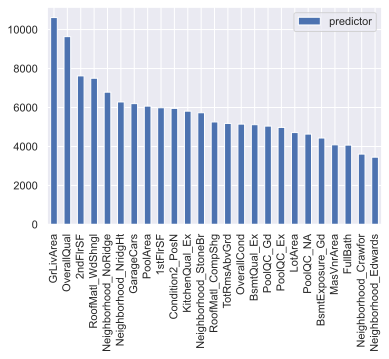

In [137]:
linreg_coef.abs().sort_values(by="predictor", ascending=False).iloc[0:25].plot.bar();

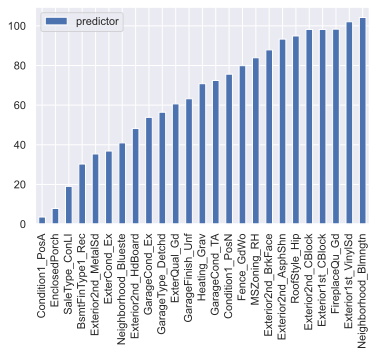

In [138]:
linreg_coef.abs().sort_values(by="predictor", ascending=True).iloc[0:25].plot.bar();

Importances analysis also shows, that all features have some impact on the model, thus there are no features with impact close to 0. However some features are more impactful, than the others.

Usage of reducted number of regressors (eliminating less important ones) does not yeild better results at all. RMSE is fluctuating between 0.15-0.19 and not overperforms 0.123.

## Not tuned RF (not scaled data)

In [351]:
rf_nt = RandomForestRegressor(n_estimators=100, random_state=17)
rf_nt.fit(X_train, Y_train)
pr_nt = rf_nt.predict(X_test)


result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('rfr_nt.csv', index=False)

The result is 0.14569 RMSE.

## Not tuned RF (scaled data)

In [353]:
rf_nt = RandomForestRegressor(n_estimators=100, random_state=17)
rf_nt.fit(X_train_scaled, Y_train)
pr_nt = rf_nt.predict(X_test_scaled)


result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('rfr_nt.csv', index=False)

The result is 0.14769 RMSE. Not scaled data outperforms scaled in predictions.

## Catboost (not scaled data)

Taking 5000 estimators as it was the best try from before.

In [360]:
model = CatBoostRegressor(verbose=0, n_estimators=5000)
model.fit(X_train, Y_train)

In [361]:
pr_nt = model.predict(X_test)

result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('new_catboost_dv.csv', index=False)

The result is RMSE = 0.12327, which is the best so far!

## Catboost (scaled data)

In [357]:
model = CatBoostRegressor(verbose=0, n_estimators=5000)
model.fit(X_train_scaled, Y_train)

In [358]:
pr_nt = model.predict(X_test_scaled)

result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('new_catboost_dv.csv', index=False)

RMSE = 0.12579, not scaled data outperforms scaled again.

## More tuning of Catboost

In [379]:
from sklearn.model_selection import RandomizedSearchCV

model = CatBoostRegressor(verbose=0)
parameters = {'depth' : [4, 5, 6, 7, 8, 9, 10],
              'learning_rate' : [0.001, 0.01, 0.05, 0.1],
              'n_estimators'    : [10, 20, 50, 100, 200, 250, 500, 750, 1000, 2000, 3000, 4000, 5000]
              }
distributions = dict(depth = [4, 5, 6, 7, 8, 9, 10])

grid = RandomizedSearchCV(model, parameters, cv = 3, verbose = 1)
grid.fit(X_train, Y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000023FCB7AF470>,
                   param_distributions={'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'n_estimators': [10, 20, 50, 100, 200,
                                                         250, 500, 750, 1000,
                                                         2000, 3000, 4000,
                                                         5000]},
                   verbose=1)

In [385]:
grid.best_params_

{'n_estimators': 2000, 'learning_rate': 0.1, 'depth': 5}

In [386]:
model = CatBoostRegressor(verbose=0)
parameters = {'depth' : [5, 6],
              'learning_rate' : [0.1, 0.2],
              'n_estimators'    : [1000, 2000, 3000, 4000, 5000],
              'l2_leaf_reg': ["None", 0.1, 0.12, 0.2]
              }
distributions = dict(depth = [4, 5, 6, 7, 8, 9, 10])

grid = RandomizedSearchCV(model, parameters, cv = 3, verbose = 1)
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000023FDAF767B8>,
                   param_distributions={'depth': [5, 6],
                                        'l2_leaf_reg': ['None', 0.1, 0.12, 0.2],
                                        'learning_rate': [0.1, 0.2],
                                        'n_estimators': [1000, 2000, 3000, 4000,
                                                         5000]},
                   verbose=1)

In [387]:
grid.best_params_

{'n_estimators': 3000, 'learning_rate': 0.1, 'l2_leaf_reg': 0.2, 'depth': 5}

In [431]:
pr_nt = grid.predict(X_test)

result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('new_catboost_dv.csv', index=False)

More tuning not allows to get better result, RMSE = 0.12781, which is good, but lower than the best.

## Neural Network (Tensorflow)

In [126]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [223]:
keras.backend.clear_session()

In [195]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(141, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [196]:
linear_model.compile(loss='mean_absolute_error',
                optimizer='adam')



In [204]:
linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 141)               39903     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 142       
Total params: 40,045
Trainable params: 40,045
Non-trainable params: 0
_________________________________________________________________


In [198]:
history = linear_model.fit(
    X_train, Y_train,
    epochs=2000,
    # suppress logging
    verbose=2,
    # Calculate validation results on 20% of the training data
    #validation_split = 0.2,
    #callbacks = [callbacks]
)


Epoch 1/2000
46/46 - 1s - loss: 174792.2344
Epoch 2/2000
46/46 - 0s - loss: 158357.0156
Epoch 3/2000
46/46 - 0s - loss: 130478.0391
Epoch 4/2000
46/46 - 0s - loss: 89836.9297
Epoch 5/2000
46/46 - 0s - loss: 54454.3242
Epoch 6/2000
46/46 - 0s - loss: 47209.0156
Epoch 7/2000
46/46 - 0s - loss: 46240.2344
Epoch 8/2000
46/46 - 0s - loss: 45288.5352
Epoch 9/2000
46/46 - 0s - loss: 44184.9297
Epoch 10/2000
46/46 - 0s - loss: 42960.5742
Epoch 11/2000
46/46 - 0s - loss: 41577.6250
Epoch 12/2000
46/46 - 0s - loss: 40348.3359
Epoch 13/2000
46/46 - 0s - loss: 38947.5469
Epoch 14/2000
46/46 - 0s - loss: 37636.1758
Epoch 15/2000
46/46 - 0s - loss: 36221.6914
Epoch 16/2000
46/46 - 0s - loss: 34926.0859
Epoch 17/2000
46/46 - 0s - loss: 33705.2891
Epoch 18/2000
46/46 - 0s - loss: 32757.6348
Epoch 19/2000
46/46 - 0s - loss: 32023.5156
Epoch 20/2000
46/46 - 0s - loss: 31285.9883
Epoch 21/2000
46/46 - 0s - loss: 30826.3535
Epoch 22/2000
46/46 - 0s - loss: 30350.7266
Epoch 23/2000
46/46 - 0s - loss: 29922

Epoch 186/2000
46/46 - 0s - loss: 24853.0801
Epoch 187/2000
46/46 - 0s - loss: 24687.4766
Epoch 188/2000
46/46 - 0s - loss: 24826.2676
Epoch 189/2000
46/46 - 0s - loss: 24710.2676
Epoch 190/2000
46/46 - 0s - loss: 24657.0059
Epoch 191/2000
46/46 - 0s - loss: 24689.7461
Epoch 192/2000
46/46 - 0s - loss: 24677.7402
Epoch 193/2000
46/46 - 0s - loss: 24677.6797
Epoch 194/2000
46/46 - 0s - loss: 24564.8594
Epoch 195/2000
46/46 - 0s - loss: 24654.7422
Epoch 196/2000
46/46 - 0s - loss: 24628.4512
Epoch 197/2000
46/46 - 0s - loss: 24580.8828
Epoch 198/2000
46/46 - 0s - loss: 24653.4980
Epoch 199/2000
46/46 - 0s - loss: 24599.9570
Epoch 200/2000
46/46 - 0s - loss: 24583.3691
Epoch 201/2000
46/46 - 0s - loss: 24507.1074
Epoch 202/2000
46/46 - 0s - loss: 24620.8770
Epoch 203/2000
46/46 - 0s - loss: 24470.0137
Epoch 204/2000
46/46 - 0s - loss: 24575.3184
Epoch 205/2000
46/46 - 0s - loss: 24507.9375
Epoch 206/2000
46/46 - 0s - loss: 24533.5254
Epoch 207/2000
46/46 - 0s - loss: 24408.1309
Epoch 208/

Epoch 369/2000
46/46 - 0s - loss: 22020.7656
Epoch 370/2000
46/46 - 0s - loss: 22130.3730
Epoch 371/2000
46/46 - 0s - loss: 22036.4922
Epoch 372/2000
46/46 - 0s - loss: 22104.6074
Epoch 373/2000
46/46 - 0s - loss: 22060.1836
Epoch 374/2000
46/46 - 0s - loss: 22063.0352
Epoch 375/2000
46/46 - 0s - loss: 21958.7676
Epoch 376/2000
46/46 - 0s - loss: 22021.7676
Epoch 377/2000
46/46 - 0s - loss: 22004.1250
Epoch 378/2000
46/46 - 0s - loss: 21865.7305
Epoch 379/2000
46/46 - 0s - loss: 21947.8066
Epoch 380/2000
46/46 - 0s - loss: 21852.2949
Epoch 381/2000
46/46 - 0s - loss: 21874.1328
Epoch 382/2000
46/46 - 0s - loss: 21886.8926
Epoch 383/2000
46/46 - 0s - loss: 21811.6738
Epoch 384/2000
46/46 - 0s - loss: 21892.6465
Epoch 385/2000
46/46 - 0s - loss: 21949.4473
Epoch 386/2000
46/46 - 0s - loss: 21791.0176
Epoch 387/2000
46/46 - 0s - loss: 21763.2402
Epoch 388/2000
46/46 - 0s - loss: 21747.6172
Epoch 389/2000
46/46 - 0s - loss: 21906.8105
Epoch 390/2000
46/46 - 0s - loss: 21803.3867
Epoch 391/

Epoch 552/2000
46/46 - 0s - loss: 19519.0996
Epoch 553/2000
46/46 - 0s - loss: 19483.6816
Epoch 554/2000
46/46 - 0s - loss: 19487.2129
Epoch 555/2000
46/46 - 0s - loss: 19461.8770
Epoch 556/2000
46/46 - 0s - loss: 19442.0312
Epoch 557/2000
46/46 - 0s - loss: 19511.2148
Epoch 558/2000
46/46 - 0s - loss: 19409.6777
Epoch 559/2000
46/46 - 0s - loss: 19419.6738
Epoch 560/2000
46/46 - 0s - loss: 19414.6309
Epoch 561/2000
46/46 - 0s - loss: 19287.0293
Epoch 562/2000
46/46 - 0s - loss: 19418.1328
Epoch 563/2000
46/46 - 0s - loss: 19423.9785
Epoch 564/2000
46/46 - 0s - loss: 19497.1016
Epoch 565/2000
46/46 - 0s - loss: 19443.6582
Epoch 566/2000
46/46 - 0s - loss: 19346.7910
Epoch 567/2000
46/46 - 0s - loss: 19331.1895
Epoch 568/2000
46/46 - 0s - loss: 19291.2441
Epoch 569/2000
46/46 - 0s - loss: 19266.3789
Epoch 570/2000
46/46 - 0s - loss: 19361.5352
Epoch 571/2000
46/46 - 0s - loss: 19210.8105
Epoch 572/2000
46/46 - 0s - loss: 19186.8965
Epoch 573/2000
46/46 - 0s - loss: 19236.5430
Epoch 574/

Epoch 735/2000
46/46 - 0s - loss: 17736.0938
Epoch 736/2000
46/46 - 0s - loss: 17749.9473
Epoch 737/2000
46/46 - 0s - loss: 17862.1641
Epoch 738/2000
46/46 - 0s - loss: 17929.7578
Epoch 739/2000
46/46 - 0s - loss: 17789.1562
Epoch 740/2000
46/46 - 0s - loss: 17776.2891
Epoch 741/2000
46/46 - 0s - loss: 17724.8223
Epoch 742/2000
46/46 - 0s - loss: 17772.1172
Epoch 743/2000
46/46 - 0s - loss: 17770.6836
Epoch 744/2000
46/46 - 0s - loss: 17741.7129
Epoch 745/2000
46/46 - 0s - loss: 17736.9609
Epoch 746/2000
46/46 - 0s - loss: 17707.4492
Epoch 747/2000
46/46 - 0s - loss: 17630.1445
Epoch 748/2000
46/46 - 0s - loss: 17695.5098
Epoch 749/2000
46/46 - 0s - loss: 17863.1836
Epoch 750/2000
46/46 - 0s - loss: 17821.9258
Epoch 751/2000
46/46 - 0s - loss: 17804.8105
Epoch 752/2000
46/46 - 0s - loss: 17874.6484
Epoch 753/2000
46/46 - 0s - loss: 17674.5195
Epoch 754/2000
46/46 - 0s - loss: 17633.3281
Epoch 755/2000
46/46 - 0s - loss: 17555.6309
Epoch 756/2000
46/46 - 0s - loss: 17592.5898
Epoch 757/

46/46 - 0s - loss: 16783.3691
Epoch 918/2000
46/46 - 0s - loss: 16807.1836
Epoch 919/2000
46/46 - 0s - loss: 16703.7812
Epoch 920/2000
46/46 - 0s - loss: 16721.5391
Epoch 921/2000
46/46 - 0s - loss: 16652.7246
Epoch 922/2000
46/46 - 0s - loss: 16692.5664
Epoch 923/2000
46/46 - 0s - loss: 16727.8691
Epoch 924/2000
46/46 - 0s - loss: 16733.5547
Epoch 925/2000
46/46 - 0s - loss: 16786.7188
Epoch 926/2000
46/46 - 0s - loss: 16720.1133
Epoch 927/2000
46/46 - 0s - loss: 17040.9980
Epoch 928/2000
46/46 - 0s - loss: 16665.3438
Epoch 929/2000
46/46 - 0s - loss: 16616.3184
Epoch 930/2000
46/46 - 0s - loss: 16772.8359
Epoch 931/2000
46/46 - 0s - loss: 16716.2500
Epoch 932/2000
46/46 - 0s - loss: 16716.7930
Epoch 933/2000
46/46 - 0s - loss: 16721.7656
Epoch 934/2000
46/46 - 0s - loss: 16706.1387
Epoch 935/2000
46/46 - 0s - loss: 16672.6953
Epoch 936/2000
46/46 - 0s - loss: 16681.9512
Epoch 937/2000
46/46 - 0s - loss: 16654.1152
Epoch 938/2000
46/46 - 0s - loss: 16816.6543
Epoch 939/2000
46/46 - 0s

Epoch 1098/2000
46/46 - 0s - loss: 16329.7393
Epoch 1099/2000
46/46 - 0s - loss: 16176.3662
Epoch 1100/2000
46/46 - 0s - loss: 16089.0811
Epoch 1101/2000
46/46 - 0s - loss: 16146.9629
Epoch 1102/2000
46/46 - 0s - loss: 16187.5215
Epoch 1103/2000
46/46 - 0s - loss: 16023.8809
Epoch 1104/2000
46/46 - 0s - loss: 16014.0410
Epoch 1105/2000
46/46 - 0s - loss: 16144.9990
Epoch 1106/2000
46/46 - 0s - loss: 16117.4756
Epoch 1107/2000
46/46 - 0s - loss: 15990.8633
Epoch 1108/2000
46/46 - 0s - loss: 16145.8525
Epoch 1109/2000
46/46 - 0s - loss: 16073.0195
Epoch 1110/2000
46/46 - 0s - loss: 15942.8906
Epoch 1111/2000
46/46 - 0s - loss: 15959.1836
Epoch 1112/2000
46/46 - 0s - loss: 15983.2861
Epoch 1113/2000
46/46 - 0s - loss: 15958.7490
Epoch 1114/2000
46/46 - 0s - loss: 15962.1982
Epoch 1115/2000
46/46 - 0s - loss: 16001.5928
Epoch 1116/2000
46/46 - 0s - loss: 15937.6055
Epoch 1117/2000
46/46 - 0s - loss: 16008.7725
Epoch 1118/2000
46/46 - 0s - loss: 16197.1875
Epoch 1119/2000
46/46 - 0s - loss:

Epoch 1277/2000
46/46 - 0s - loss: 15527.0586
Epoch 1278/2000
46/46 - 0s - loss: 15500.2324
Epoch 1279/2000
46/46 - 0s - loss: 15514.7188
Epoch 1280/2000
46/46 - 0s - loss: 15481.4658
Epoch 1281/2000
46/46 - 0s - loss: 15643.8682
Epoch 1282/2000
46/46 - 0s - loss: 15643.6318
Epoch 1283/2000
46/46 - 0s - loss: 15464.9736
Epoch 1284/2000
46/46 - 0s - loss: 15418.5889
Epoch 1285/2000
46/46 - 0s - loss: 15462.5244
Epoch 1286/2000
46/46 - 0s - loss: 15604.9385
Epoch 1287/2000
46/46 - 0s - loss: 15535.3545
Epoch 1288/2000
46/46 - 0s - loss: 15622.8633
Epoch 1289/2000
46/46 - 0s - loss: 15298.9941
Epoch 1290/2000
46/46 - 0s - loss: 15357.8428
Epoch 1291/2000
46/46 - 0s - loss: 15380.2324
Epoch 1292/2000
46/46 - 0s - loss: 15594.9600
Epoch 1293/2000
46/46 - 0s - loss: 15475.3203
Epoch 1294/2000
46/46 - 0s - loss: 15492.4316
Epoch 1295/2000
46/46 - 0s - loss: 15673.7607
Epoch 1296/2000
46/46 - 0s - loss: 15537.8154
Epoch 1297/2000
46/46 - 0s - loss: 15536.6621
Epoch 1298/2000
46/46 - 0s - loss:

Epoch 1456/2000
46/46 - 0s - loss: 15049.4258
Epoch 1457/2000
46/46 - 0s - loss: 15098.7412
Epoch 1458/2000
46/46 - 0s - loss: 14919.9961
Epoch 1459/2000
46/46 - 0s - loss: 15100.9688
Epoch 1460/2000
46/46 - 0s - loss: 14942.7490
Epoch 1461/2000
46/46 - 0s - loss: 15058.4727
Epoch 1462/2000
46/46 - 0s - loss: 14973.1562
Epoch 1463/2000
46/46 - 0s - loss: 15058.1797
Epoch 1464/2000
46/46 - 0s - loss: 15084.5439
Epoch 1465/2000
46/46 - 0s - loss: 15025.1738
Epoch 1466/2000
46/46 - 0s - loss: 14941.4092
Epoch 1467/2000
46/46 - 0s - loss: 14885.7354
Epoch 1468/2000
46/46 - 0s - loss: 14894.3506
Epoch 1469/2000
46/46 - 0s - loss: 14923.4971
Epoch 1470/2000
46/46 - 0s - loss: 14963.4521
Epoch 1471/2000
46/46 - 0s - loss: 14867.3467
Epoch 1472/2000
46/46 - 0s - loss: 14890.6982
Epoch 1473/2000
46/46 - 0s - loss: 14999.4004
Epoch 1474/2000
46/46 - 0s - loss: 14923.7070
Epoch 1475/2000
46/46 - 0s - loss: 14881.4561
Epoch 1476/2000
46/46 - 0s - loss: 14875.6768
Epoch 1477/2000
46/46 - 0s - loss:

Epoch 1635/2000
46/46 - 0s - loss: 14440.4805
Epoch 1636/2000
46/46 - 0s - loss: 14463.3818
Epoch 1637/2000
46/46 - 0s - loss: 14526.9180
Epoch 1638/2000
46/46 - 0s - loss: 14561.1865
Epoch 1639/2000
46/46 - 0s - loss: 14524.1406
Epoch 1640/2000
46/46 - 0s - loss: 14591.5674
Epoch 1641/2000
46/46 - 0s - loss: 14421.0908
Epoch 1642/2000
46/46 - 0s - loss: 14466.4600
Epoch 1643/2000
46/46 - 0s - loss: 14593.4668
Epoch 1644/2000
46/46 - 0s - loss: 14629.9824
Epoch 1645/2000
46/46 - 0s - loss: 14575.1133
Epoch 1646/2000
46/46 - 0s - loss: 14622.7080
Epoch 1647/2000
46/46 - 0s - loss: 14612.7539
Epoch 1648/2000
46/46 - 0s - loss: 14585.4424
Epoch 1649/2000
46/46 - 0s - loss: 14683.3428
Epoch 1650/2000
46/46 - 0s - loss: 14495.2314
Epoch 1651/2000
46/46 - 0s - loss: 14430.1221
Epoch 1652/2000
46/46 - 0s - loss: 14405.1270
Epoch 1653/2000
46/46 - 0s - loss: 14442.7373
Epoch 1654/2000
46/46 - 0s - loss: 14625.1523
Epoch 1655/2000
46/46 - 0s - loss: 14437.4531
Epoch 1656/2000
46/46 - 0s - loss:

Epoch 1814/2000
46/46 - 0s - loss: 14134.2109
Epoch 1815/2000
46/46 - 0s - loss: 14329.9941
Epoch 1816/2000
46/46 - 0s - loss: 14074.3594
Epoch 1817/2000
46/46 - 0s - loss: 14198.8271
Epoch 1818/2000
46/46 - 0s - loss: 14061.4717
Epoch 1819/2000
46/46 - 0s - loss: 14175.0479
Epoch 1820/2000
46/46 - 0s - loss: 14259.6895
Epoch 1821/2000
46/46 - 0s - loss: 14497.3848
Epoch 1822/2000
46/46 - 0s - loss: 14087.8193
Epoch 1823/2000
46/46 - 0s - loss: 14230.8877
Epoch 1824/2000
46/46 - 0s - loss: 14043.6641
Epoch 1825/2000
46/46 - 0s - loss: 14230.5312
Epoch 1826/2000
46/46 - 0s - loss: 14072.2383
Epoch 1827/2000
46/46 - 0s - loss: 14081.1895
Epoch 1828/2000
46/46 - 0s - loss: 14136.5605
Epoch 1829/2000
46/46 - 0s - loss: 14194.5586
Epoch 1830/2000
46/46 - 0s - loss: 14067.2246
Epoch 1831/2000
46/46 - 0s - loss: 14537.2119
Epoch 1832/2000
46/46 - 0s - loss: 14145.2305
Epoch 1833/2000
46/46 - 0s - loss: 14056.2324
Epoch 1834/2000
46/46 - 0s - loss: 14235.6455
Epoch 1835/2000
46/46 - 0s - loss:

Epoch 1993/2000
46/46 - 0s - loss: 13717.1865
Epoch 1994/2000
46/46 - 0s - loss: 13898.2744
Epoch 1995/2000
46/46 - 0s - loss: 13834.5537
Epoch 1996/2000
46/46 - 0s - loss: 13804.0352
Epoch 1997/2000
46/46 - 0s - loss: 13919.5508
Epoch 1998/2000
46/46 - 0s - loss: 14027.8057
Epoch 1999/2000
46/46 - 0s - loss: 13925.7139
Epoch 2000/2000
46/46 - 0s - loss: 13921.0479


In [199]:
linear_model.predict(X_test)

array([[123826.94],
       [168760.1 ],
       [196857.38],
       ...,
       [169191.69],
       [121796.09],
       [214016.86]], dtype=float32)

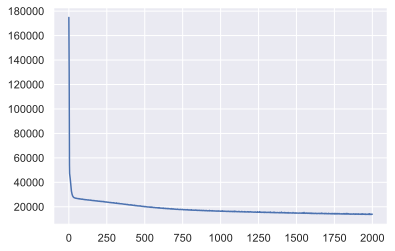

In [200]:
plt.plot(history.history['loss'], label='loss')

Such a naive approach, actually shows quite decent result - RMSE = 0.13036, which is not the best, but an upper tier result.

More training with different combanation of "hidden" Dense layers not produce better results at all.

## More training

Any other type of the Neural Network did not perform too well with the data, including different scaling. The results are fluctuated between 0.15-0.19 RMSE, and are hardly interpretable. The best of created models are closing to 0.135, but not beats simple approach, as well as non Neural Network models.

## Conclusions

With the tried appoach to handle data - the maximum achived result is RMSE of 0.12327. XGBoost can demonstrate similar result (with parameters tuninig), and perhaps with more serious tuning the RMSE ca be improved even further. In order to achive better results, perhaps some of the data has to be transformed into other compound features, thus reducing thier number.

## Models and thier comparison

Here in the table gathered all the models, that were tested out, and the result of the Kaggle competition. The metric from Kaggle is Root-Mean-Squared-Error (RMSE). The smaller is the better.

By bold marked the best result.

| Model   | Notes        | RMSE          | Miscellaneous |  
|---------|--------------|---------------|---------------|
|1st approach|
|Multiple Linear Regression|Lable encoding of the features, simple LR, 75 features| 0.44779 | High mulicollinearity|
|Multiple Linear Regression|Dummy variables encoding of the features, simple LR, 274 features| 0.52509 | High mulicollinearity|
|Tuned Decision Tree Regressor|Label encoding, Depth = 18, Max features = 54 |0.20753||
|Not Tuned Random Forest Regressor| Label encoding, Default parameters | 0.14604| |
|Not Tuned Random Forest Regressor| Dummy variables, Default parameters, 274 features |0.14517| |
|Tuned Random Forest Regressor| Label encoding, Depth = 18, Max features = 62 | 0.14957| cv = 3, range is bigger |
|Tuned Random Forest Regressor| Label encoding, Depth = 22, Max features = 34 |0.14395 | cv = 5, range is smaller|
|Tuned Random Forest Regressor| Dummy variables, Depth = 14, Max features = 82 |0.14392 | cv = 5|
|Lasso Regression Simple|Label encoding, 75 features|0.44778||
|Lasso Regression CV|Label encoding, 75 features|0.32349|cv = 5|
|Ridge Regression Simple|Label encoding, 75 features|0.44720||
|Ridge Regression CV|Label encoding, 75 features|0.16087|cv = 5|
|Ridge Regression CV|Dummy variables, 274 features |0.14361|cv = 5|
|Bayesian Rigde Regression |Label encoding, 75 features|0.16093||
|Bayesian Rigde Regression |Dummy variables, 274 features|0.14520||
|Gradient Boosting Regression |Label encoding, 75 features|0.16228||
|Gradient Boosting Regression |Dummy variables, 274 features|0.13573||
|Histogram-based Gradient Boosting Regression |Label encoding, 75 features|0.13289||
|Histogram-based Gradient Boosting Regression |Dummy variables, 274 features|0.13411||
|**Catboost regression** |Dummy variables, 274 features|0.12416| Top 15% of Kaggle competition|
|2nd approach|
|Ridge Regression CV|Dummy variables, scaled data|0.16661|cv = 5|
|Not Tuned Random Forest Regressor| Dummy variables, not scaled data| 0.14569||
|Not Tuned Random Forest Regressor| Dummy variables, scaled data| 0.14769||
|**Catboost regression** |Dummy variables, not scaled data|0.12327| Top 13% of Kaggle competition|
|XGBoost|Not scaled data|0.124-0.129||
|Catboost regression |Dummy variables, scaled data|0.12579| |
|Deep Neural Network|Dense(141, activation='relu') <br>Dense(1) <br> Not scaled data|0.13036||
|Other Neural Networks configurations (DNN, RNN, etc.)|Scaled and not scaled data|0.135-0.19||
